# <center> Êï∞ÊçÆÊåñÊéòÂ§ß‰Ωú‰∏öÔºöÂÆáÂÆôÈ£ûËàπÊ≥∞Âù¶Â∞ºÂÖãÂè∑ </center>

**import** ÂØºÂÖ•Âú®ËøáÁ®ãÂΩì‰∏≠ÂèØËÉΩ‰ºö‰ΩøÁî®Âà∞ÁöÑpythonÂåÖ

In [139]:
# Core
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
# from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split


from lightgbm import LGBMClassifier
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')
print('Done')

Done


## Êï∞ÊçÆ

**Âä†ËΩΩÊï∞ÊçÆ**

In [140]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv') # ËÆ≠ÁªÉÈõÜ
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')   # ÊµãËØïÈõÜ

print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

**ÂäüËÉΩÊèèËø∞Ôºö**
- **PassengerId** - ÊØè‰Ωç‰πòÂÆ¢ÁöÑÂîØ‰∏ÄID„ÄÇÊØè‰∏™IDÁöÑÂΩ¢Âºè‰∏∫gggg_ppÔºåÂÖ∂‰∏≠ggggË°®Á§∫‰πòÂÆ¢ÊâÄÂú®ÁöÑÁªÑÔºåppË°®Á§∫ËØ•ÁªÑ‰∏≠ÁöÑÁºñÂè∑„ÄÇ‰∏Ä‰∏™ÁªÑ‰∏≠ÁöÑ‰∫∫ÈÄöÂ∏∏ÊòØÂÆ∂‰∫∫Ôºå‰ΩÜ‰∏çÊÄªÊòØ„ÄÇ
- **HomePlanet** - ‰πòÂÆ¢Âá∫ÂèëÁöÑÊòüÁêÉÔºåÈÄöÂ∏∏ÊòØ‰ªñ‰ª¨ÁöÑÂ∏∏È©ªÊòüÁêÉ„ÄÇ
- **CryoSleep** - Ë°®Á§∫‰πòÂÆ¢ÊòØÂê¶ÈÄâÊã©Âú®Ëà™Ë°åÊúüÈó¥ËøõÂÖ•ÊÇ¨ÊµÆÂä®ÁîªÁä∂ÊÄÅ„ÄÇÂ§Ñ‰∫éÊÇ¨ÊµÆÂä®ÁîªÁä∂ÊÄÅÁöÑ‰πòÂÆ¢Ë¢´ÈôêÂà∂Âú®Ëá™Â∑±ÁöÑËà±ÂÆ§ÂÜÖ„ÄÇ
- **Cabin** - ‰πòÂÆ¢ÊâÄÂ±Ö‰ΩèÁöÑËà±ÂÆ§Âè∑Á†Å„ÄÇÂΩ¢Âºè‰∏∫deck/num/sideÔºåÂÖ∂‰∏≠sideÂèØ‰ª•ÊòØPÔºàËà∑‰æßÔºâÊàñSÔºàËà∑‰æßÔºâ„ÄÇ
- **Destination** - ‰πòÂÆ¢Â∞ÜË¶Å‰∏ãËàπÁöÑÊòüÁêÉ„ÄÇ
- **Age** - ‰πòÂÆ¢ÁöÑÂπ¥ÈæÑ„ÄÇ
- **VIP** - ‰πòÂÆ¢ÊòØÂê¶ÊîØ‰ªò‰∫ÜË±™ÂçéVIPÊúçÂä°Ë¥π„ÄÇ
- **RoomService**Ôºå**FoodCourt**Ôºå**ShoppingMall**Ôºå**Spa**Ôºå**VRDeck** - ‰πòÂÆ¢Âú®Â§™Á©∫Ê∏∏ËΩÆ‚ÄúÊ≥∞Âù¶Â∞ºÂÖãÂè∑‚Äù‰∏äÁöÑËÆ∏Â§öÂ•¢ÂçéËÆæÊñΩ‰∏äÁöÑÊ∂àË¥πÈáëÈ¢ù„ÄÇ
- **Name** - ‰πòÂÆ¢ÁöÑÂêçÂ≠óÂíåÂßìÊ∞è„ÄÇ
- **Transported** - ‰πòÂÆ¢ÊòØÂê¶Ë¢´‰º†ÈÄÅÂà∞Âè¶‰∏Ä‰∏™Áª¥Â∫¶„ÄÇËøôÊòØÁõÆÊ†áÔºå‰Ω†Ë¶ÅÈ¢ÑÊµãÁöÑÂàó„ÄÇ


In [141]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}')
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 8693
Number of columns in train data: 14
Number of values in train data: 119378
Number missing values in train data: 2324


Êü•ÁúãÊØè‰∏ÄË°åÊï∞ÊçÆ‰∏≠Âá∫Áé∞Áº∫Â§±ÂÄºÁöÑÊï∞Èáè

In [142]:
print(f'\033[94m')
print(train.isna().sum().sort_values(ascending = False))


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


Ê£ÄÊü•Êï∞ÊçÆÈõÜ‰∏≠ÊúâÊ≤°ÊúâÈáçÂ§çÊï∞ÊçÆ

In [143]:
print(f'\033[94m')
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')


Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


Êúâ‰∏äÈù¢ÂèØ‰ª•ÁúãÂà∞Êï∞ÊçÆÈõÜ‰∏çÈîôÔºåÈáåÈù¢ÊòØÊ≤°ÊúâÈáçÂ§çÂÄºÂá∫Áé∞ÁöÑÔºå‰ΩÜÊòØÁº∫Â§±ÂÄºÁ°ÆÂÆû‰∏çÂ∞ëÔºåÊàë‰ª¨ÂÖàÊù•ÁúãÁúãÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÁâπÂæÅÔºåÊúÄÂêéÊòØÈúÄË¶ÅÂØπ‰∫éÁº∫Â§±ÂÄºËøõË°åÂ§ÑÁêÜÁöÑ

In [144]:
train.nunique() # ËÆ≠ÁªÉÈõÜÂîØ‰∏ÄÂÄº

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [145]:
train.dtypes # ËÆ≠ÁªÉÈõÜÊï∞ÊçÆÁ±ªÂûã

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Âú®ËøõË°åÂÆåÊï∞ÊçÆÂ§ÑÁêÜ‰πãÂêéÈúÄË¶ÅÂ∞ÜÈùûÊï∞ÂÄºÂûãÁöÑÊï∞ÊçÆËΩ¨ÂåñÊàê‰∏∫Êï∞ÂÄºÂûãÁöÑÊï∞ÊçÆÔºå‰ª•‰æø‰∫éÊ®°ÂûãÁöÑÂ§ÑÁêÜ

## Êé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê

ÂàÜÊûêÁõÆÊ†áÁöÑÂàÜÂ∏ÉËßÑÂæã

Text(0.5, 1.0, 'Target_distribution')

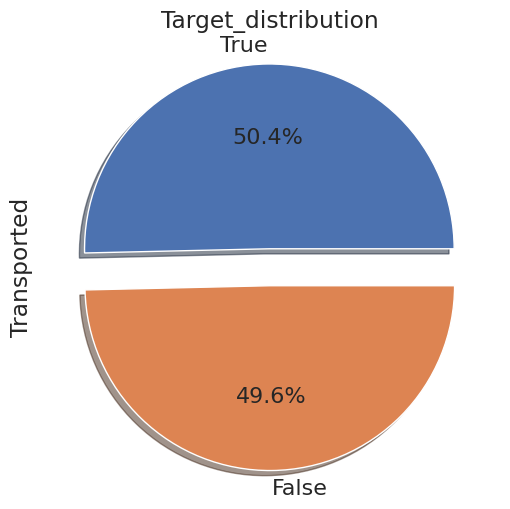

In [146]:
plt.figure(figsize=(6,6))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target_distribution")

Áî±‰∏äÈù¢ÁöÑÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞ÂàÜÂ∏ÉÂü∫Êú¨ÊòØÂØπÂçäÂàÜÁöÑÔºåÊâÄ‰ª•Ëøô‰∏™Êï∞ÊçÆÈõÜÊòØÊØîËæÉÂùáË°°ÁöÑ

**ËøûÁª≠ÊÄßÁâπÂæÅ**

In [147]:
# Figure size
plt.figure(figsize=(10,4))

# Êü•Áúã‰º†ÈÄÅÊàêÂäüÂíå‰∏çÊàêÂäüÁöÑÊ†∑Êú¨ÁöÑÂπ¥ÈæÑÂàÜÂ∏É
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True) # kde:Ê†∏ÂØÜÂ∫¶‰º∞ËÆ°

plt.title('Age distribution')
plt.xlabel('Age (years)')

Text(0.5, 0, 'Age (years)')

‰ªé‰∏≠ÂèØ‰ª•ÂæóÂà∞‰∏ãÈù¢ÁöÑÁªìËÆ∫Ôºö
+ 0-18Â≤ÅÁöÑ‰πòÂÆ¢‰∏≠Ôºå‰º†ÈÄÅÊàêÂäüÁöÑÊØî‰æãÊõ¥È´ò
+ 18-25Â≤ÅÁöÑ‰πòÂÆ¢‰∏≠Ôºå‰º†ÈÄÅÊàêÂäüÁöÑÊØî‰æãÊõ¥‰Ωé
+ 25Â≤Å‰ª•‰∏äÁöÑ‰πòÂÆ¢‰∏≠Ôºå‰º†ÈÄÅÊàêÂäüÁöÑÂíå‰∏çÊàêÂäüÁöÑÊØî‰æãÂü∫Êú¨Áõ∏Âêå

ËøôÁªôÂà∞Êàë‰ª¨‰∏Ä‰∏™ÂêØÁ§∫ÂèØ‰ª•ÊåâÁÖß‰∏â‰∏™Âπ¥ÈæÑÊÆµÂØπ‰∫éÊï∞ÊçÆËøõË°åÂàíÂàÜÔºåËøôÊ†∑ÂèØ‰ª•Êõ¥Â•ΩÁöÑËøõË°åÊ®°ÂûãÁöÑËÆ≠ÁªÉ

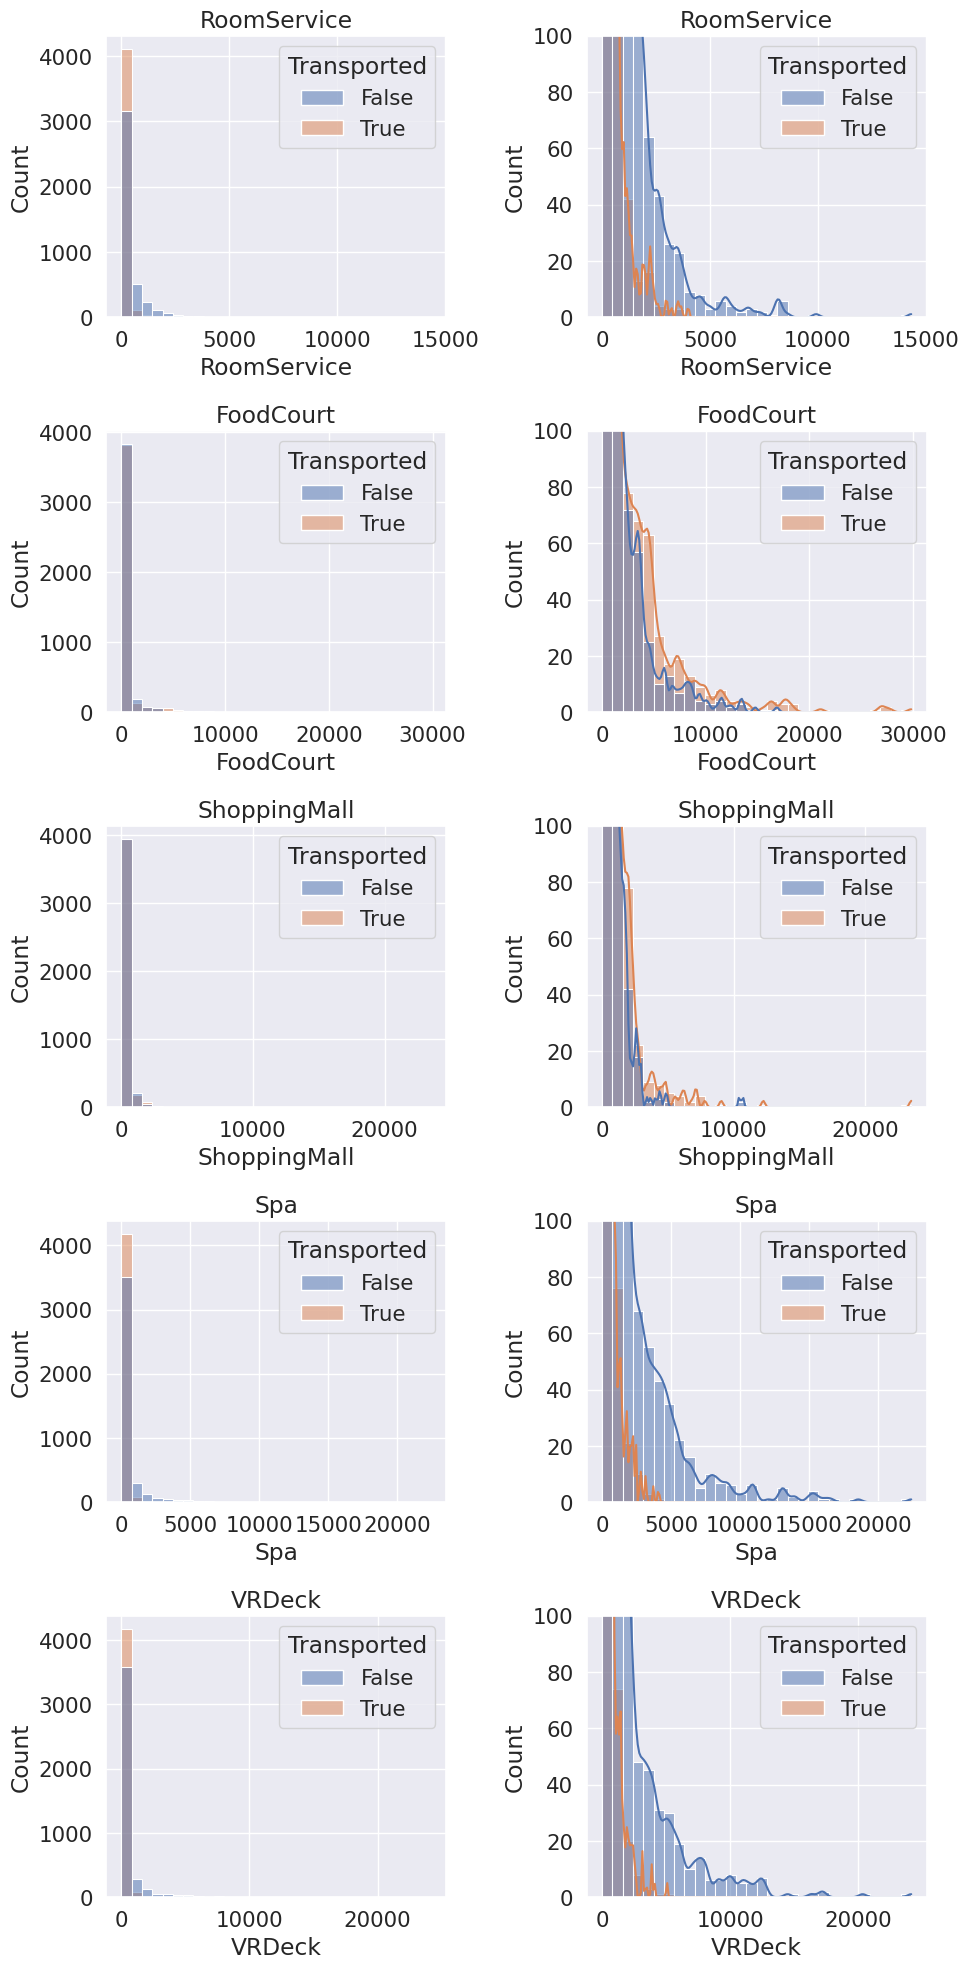

In [ ]:
# Expenditure features Ëä±Ë¥πÁâπÂæÅ
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)

    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

‰ªé‰∏≠Êàë‰ª¨ÂèØ‰ª•ÂæóÂà∞‰∏ãÈù¢ÁöÑÁªìËÆ∫Ôºö
+ Â§ßÂ§öÊï∞ÁöÑ‰∫∫Ê≤°ÊúâËä±Â§öÂ∞ëÈí±
+ Ëä±Ë¥πÁöÑÂàÜÂ∏ÉÂëàÊåáÊï∞Ë°∞ÂáèÔºàÂ¶ÇÂè≥ÂõæÊâÄÁ§∫Ôºâ
+ Â≠òÂú®‰∏ÄÂ∞èÈÉ®ÂàÜÂºÇÂ∏∏ÂÄº
+ Ë¢´‰º†ÈÄÅÁöÑ‰∫∫ÂÄæÂêë‰∫éËä±Ë¥πËæÉÂ∞ë
+ RoomServiceÔºàÂÆ¢ÊàøÊúçÂä°Ôºâ„ÄÅSpaÔºàÊ∏©Ê≥âÔºâÂíåVRDeckÔºàËôöÊãüÁé∞ÂÆûÁî≤ÊùøÔºâ‰∏éFoodCourtÔºàÁæéÈ£üÂπøÂú∫ÔºâÂíåShoppingMallÔºàË¥≠Áâ©‰∏≠ÂøÉÔºâÊúâ‰∏çÂêåÁöÑÂàÜÂ∏É - Êàë‰ª¨ÂèØ‰ª•Â∞ÜÂÖ∂ËßÜ‰∏∫Â•¢‰æàÂìÅ‰∏éÂü∫Êú¨ËÆæÊñΩ„ÄÇ

Ëøô‰∫õÂú®Êï∞ÊçÆÂ§ÑÁêÜÂΩì‰∏≠ÂèØ‰ª•ÁªôÊàë‰ª¨‰∏ãÈù¢ÁöÑÂêØÁ§∫Ôºö
+ ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑÁâπÂæÅÔºåË∑üË∏™ÊâÄÊúâ5‰∏™ËÆæÊñΩÁöÑÊÄªÊîØÂá∫„ÄÇ
+ ÂàõÂª∫‰∏Ä‰∏™‰∫åËøõÂà∂ÁâπÂæÅÔºåÁî®‰∫éÊåáÁ§∫ËØ•‰∫∫ÊòØÂê¶Ê≤°ÊúâËä±Ë¥π‰ªª‰ΩïÈáëÈ¢ùÔºàÂç≥ÊÄªÊîØÂá∫‰∏∫0Ôºâ„ÄÇ
+ ËøõË°åÂØπÊï∞ËΩ¨Êç¢‰ª•ÂáèÂ∞èÂÅèÂ∫¶„ÄÇ

**Á±ªÂà´ÁâπÂæÅ**

In [149]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

‰ªé‰∏≠Êàë‰ª¨ÂèØ‰ª•ÂæóÂà∞‰∏ãÈù¢ÁöÑÁªìËÆ∫Ôºö
+ VIPËøô‰∏™‰ø°ÊÅØÁî±‰∫éÂú®‰º†ÈÄÅÊàêÂäüÂíå‰∏çÊàêÂäüÁöÑ‰πòÂÆ¢ÈáåÈù¢Âü∫Êú¨ÈÉΩÊòØÂØπÂçäÂàÜÂ∏ÉÔºåÂõ†Ê≠§Ëøô‰∏™ÁâπÂæÅÂØπ‰∫éÊàë‰ª¨ÁöÑÊ®°ÂûãËÆ≠ÁªÉÊ≤°Êúâ‰ªÄ‰πàÂ∏ÆÂä©ÔºåÊâÄ‰ª•Êàë‰ª¨ÂèØ‰ª•Â∞ÜÂÖ∂Âà†Èô§
+ CryoSleepÂæàÈáçË¶ÅÔºåÂõ†‰∏∫Âú®‰º†ÈÄÅÊàêÂäüÁöÑ‰πòÂÆ¢‰∏≠ÔºåÂ§ßÂ§öÊï∞ÈÉΩÊòØÂú®ÂÜ∑ÂÜªÁù°Áú†‰∏≠ÈÜíÊù•ÁöÑ

Ëøô‰∫õÂú®Êï∞ÊçÆÂ§ÑÁêÜÂΩì‰∏≠ÂèØ‰ª•ÁªôÊàë‰ª¨‰∏ãÈù¢ÁöÑÂêØÁ§∫Ôºö
+ ÂèØ‰ª•Â∞ÜVIPÁâπÂæÅÂà†Èô§

**ÂÆöÊÄßÁâπÂæÅ**

In [150]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name'] # ÂÆ¢Ëà±Âè∑ÔºåÂßìÂêç
# qual_feats ÊÑèÊÄùÊòØ qualitative features

# Preview qualitative features
train[qual_feats].head()

PassengerId  Cabin               Name
0     0001_01  B/0/P    Maham Ofracculy
1     0002_01  F/0/S       Juanna Vines
2     0003_01  A/0/S      Altark Susent
3     0003_02  A/0/S       Solam Susent
4     0004_01  F/1/S  Willy Santantines

*‰ªé‰∏≠Êàë‰ª¨ÂèØ‰ª•Ëé∑Âèñ‰∏ãÈù¢ÁöÑ‰ø°ÊÅØÔºö*
* PassengerIdÁöÑÂΩ¢Âºè‰∏∫gggg_ppÔºåÂÖ∂‰∏≠ggggË°®Á§∫‰πòÂÆ¢ÊâÄÂú®ÁöÑÁªÑÔºåppË°®Á§∫ËØ•ÁªÑ‰∏≠ÁöÑÁºñÂè∑„ÄÇ
* CabinÁöÑÂΩ¢Âºè‰∏∫deck/num/sideÔºåÂÖ∂‰∏≠sideÂèØ‰ª•ÊòØPË°®Á§∫Ëà∑‰æßÔºàPortÔºâÔºåÊàñËÄÖÊòØSË°®Á§∫Ëà∑‰æßÔºàStarboardÔºâ„ÄÇ

*ÂÖ∂‰∏≠Êàë‰ª¨ÂèØ‰ª•ÂæóÂà∞ÁöÑÂêØÁ§∫Ôºö*
* Êàë‰ª¨ÂèØ‰ª•‰ªéPassengerIdÁâπÂæÅ‰∏≠ÊèêÂèñÁªÑÂà´ÂíåÁªÑÂÜÖ‰∫∫Êï∞„ÄÇ
* Êàë‰ª¨ÂèØ‰ª•‰ªéCabinÁâπÂæÅ‰∏≠ÊèêÂèñÁî≤ÊùøÔºàdeckÔºâ„ÄÅÁºñÂè∑ÔºànumberÔºâÂíåËà∑‰æßÔºàsideÔºâ„ÄÇ
* Êàë‰ª¨ÂèØ‰ª•‰ªéÂßìÂêçÔºàNameÔºâÁâπÂæÅ‰∏≠ÊèêÂèñÂßìÊ∞è‰ª•ËØÜÂà´ÂÆ∂Â∫≠„ÄÇ


## ÁâπÂæÅÂ∑•Á®ã

Ê†πÊçÆÊï∞ÊçÆÊé¢Á¥¢‰∏≠Ëé∑ÂæóÁöÑÊñπÂêëÂØπ‰∫éÊï∞ÊçÆËøõË°åÂ§ÑÁêÜ

**Âπ¥ÈæÑ**
Ê†πÊçÆ‰∏äÈù¢ÁöÑÂêØÁ§∫ÔºåÂèØ‰ª•ÁúãÂà∞ÂèØ‰ª•ÂØπ‰∫éÂπ¥ÈæÑÁöÑÂàÜÂ∏ÉËøõË°åÂàÜÁªÑÔºåËøôÊ†∑ÂèØ‰ª•Êõ¥Â•ΩÁöÑÂú®Âª∫Ê®°ÁöÑÊó∂ÂÄôÂà©Áî®‰º†ÈÄÅÊàêÂäüÁéáÂú®‰∏çÂêåÁöÑÂπ¥ÈæÑÊÆµÁöÑÂàÜÂ∏É

Text(0.5, 1.0, 'Age group distribution')

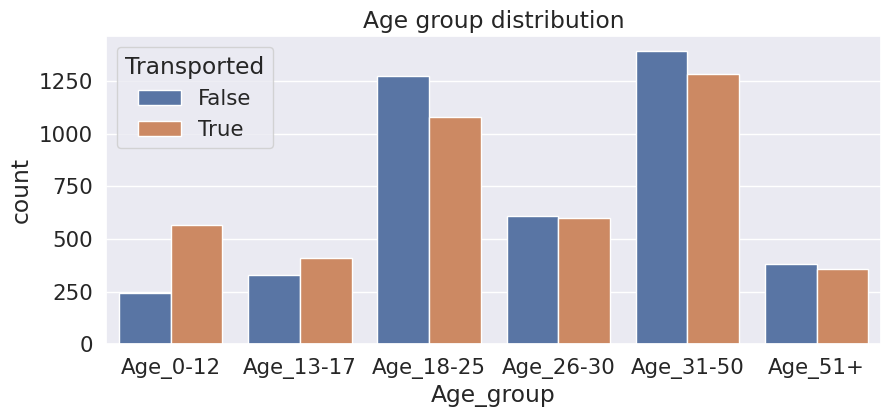

In [151]:
# New features - training set
train['Age_group']=np.nan
train.loc[train['Age']<=12,'Age_group']='Age_0-12'
train.loc[(train['Age']>12) & (train['Age']<18),'Age_group']='Age_13-17'
train.loc[(train['Age']>=18) & (train['Age']<=25),'Age_group']='Age_18-25'
train.loc[(train['Age']>25) & (train['Age']<=30),'Age_group']='Age_26-30'
train.loc[(train['Age']>30) & (train['Age']<=50),'Age_group']='Age_31-50'
train.loc[train['Age']>50,'Age_group']='Age_51+'

# New features - test set
test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0-12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13-17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18-25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26-30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31-50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=train, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

‰∏çÂêåÁªÑÂÜÖÁöÑ‰º†ÈÄÅÁöÑÊàêÂäüÁéáÊúâÂ∑ÆË∑ùÔºåÂü∫Êú¨Á¨¶ÂêàÊàë‰ª¨‰πãÂâçÊï∞ÊçÆÊé¢Á¥¢ÂΩì‰∏≠ÂæóÂá∫ÁöÑÁªìËÆ∫

**Ê∂àË¥π**

ËÆ°ÁÆóÊÄªÁöÑÊ∂àË¥πÂπ∂ÂéªÂÆö‰ΩçÂì™‰∫õÊ≤°ÊúâÊ∂àË¥πÁöÑ‰πòÂÆ¢

(0.0, 20000.0)

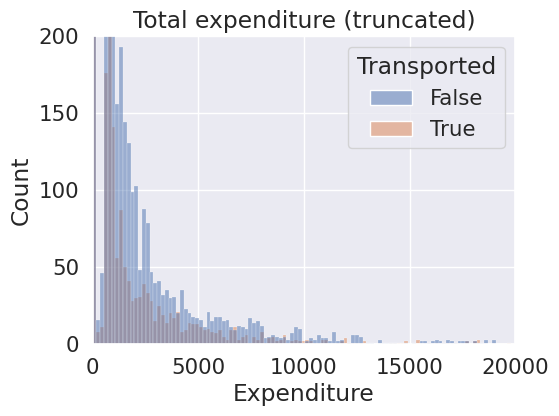

In [152]:
# New features - training set
train['Expenditure']=train[exp_feats].sum(axis=1)
train['No_spending']=(train['Expenditure']==0).astype(int)

# New features - test set
test['Expenditure']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])


In [153]:
plt.subplot(1,2,2)
sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

ÂÖ∂‰∏≠ÂèØ‰ª•ÁúãÂà∞Ê∂àË¥π‰∏∫0ÁöÑ‰πòÂÆ¢‰∏≠Ôºå‰º†ÈÄÅÊàêÂäüÁöÑÊØî‰æãË¶ÅÈ´ò‰∫é‰º†ÈÄÅÂ§±Ë¥•ÁöÑÊØî‰æãÔºåËøô‰∏™ÁâπÂæÅÂèØ‰ª•‰Ωú‰∏∫‰∏Ä‰∏™ÁâπÂæÅ

**‰πòÂÆ¢ÁöÑÂàÜÁªÑ**

‰ªé‰πòÂÆ¢ÁöÑPassengerId‰∏≠ÊèêÂèñÂá∫‰πòÂÆ¢ÁöÑÁªÑÂà´ÂíåÁªÑÂÜÖ‰∫∫Êï∞

‰∏ãÈù¢ÁöÑËøô‰∏™ÊØîËæÉÂ§ßÂõûÂ§¥ÊãøÊúçÂä°Âô®Ë∑ë‰∏Ä‰∏ãÔºåÊàëÁöÑÁîµËÑëÊúâÁÇπË∑ë‰∏çÂä®‰∫Ü

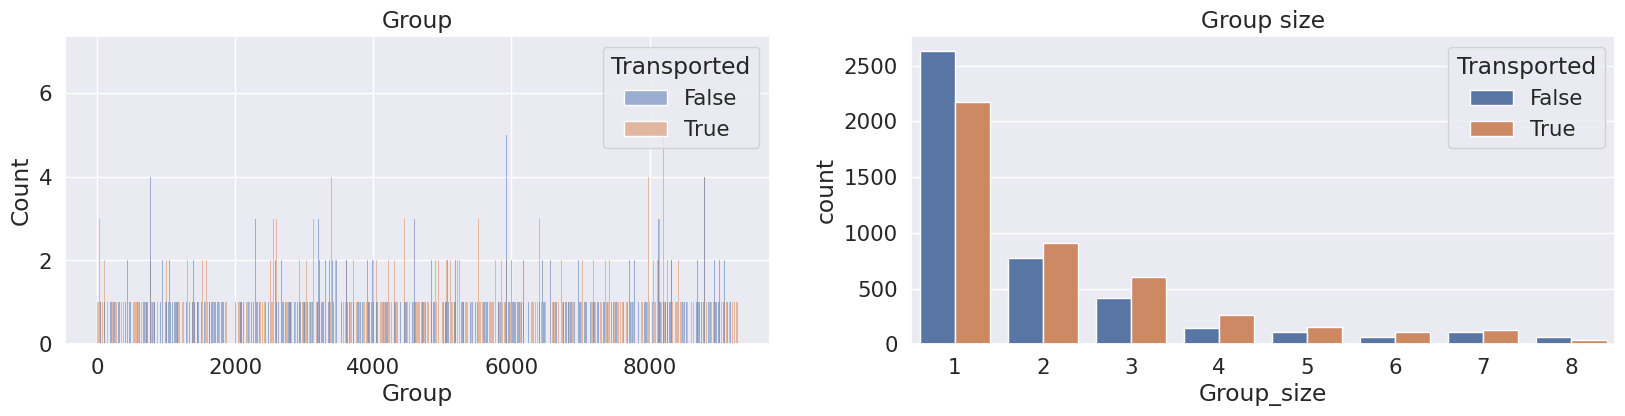

In [154]:
# New feature - Group
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

Êàë‰ª¨Êó†Ê≥ïÂú®Ê®°Âûã‰∏≠ÁúüÊ≠£‰ΩøÁî®‚ÄúGroup‚ÄùÁâπÂæÅÔºåÂõ†‰∏∫ÂÆÉÁöÑÂü∫Êï∞Â§™Â§ßÔºà6217ÔºâÔºå‰ΩøÁî®Áã¨ÁÉ≠ÁºñÁ†Å‰ºöÂØºËá¥Áª¥Â∫¶ÁàÜÁÇ∏„ÄÇ

Âè¶‰∏ÄÊñπÈù¢ÔºåÁªÑÂ§ßÂ∞èÂ∫îËØ•ÊòØ‰∏Ä‰∏™ÊúâÁî®ÁöÑÁâπÂæÅ„ÄÇÂÆûÈôÖ‰∏äÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂàõÂª∫‰∏Ä‰∏™‚ÄúSolo‚ÄùÂàóËøõ‰∏ÄÊ≠•ÂéãÁº©ËØ•ÁâπÂæÅÔºå‰ª•Ë∑üË∏™Êüê‰∫∫ÊòØÂê¶Áã¨Ëá™ÊóÖË°å„ÄÇÂè≥‰æßÁöÑÂõæË°®ÊòæÁ§∫Ôºå‰∏éÁªÑÂ§ßÂ∞èÂ§ß‰∫é1Áõ∏ÊØîÔºåÁªÑÂ§ßÂ∞è‰∏∫1ÁöÑ‰∫∫Êõ¥‰∏çÂ§™ÂèØËÉΩË¢´‰º†ÈÄÅ„ÄÇ

In [155]:
# New feature
train['Solo']=(train['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

(0.0, 3000.0)

**ÂÆö‰ΩçÁî≤Êùø‰ø°ÊÅØ**

‰ªéËà±‰ΩçÁâπÂæÅ‰∏≠ÊèêÂèñÂá∫Áî≤Êùø‰ø°ÊÅØ

In [156]:
# Replace NaN's with outliers for now (so we can split feature)
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

Ëøô‰∏™Áî≤ÊùøÁâπÂæÅÈáåÈù¢ÁöÑTÂèàÂèØËÉΩÊòØ‰∏™ÂºÇÂ∏∏ÂÄºÔºåÂ§™Â∞ë‰∫ÜÔºåÂè™Êúâ5‰∏™

ÁúãËµ∑Êù•Cabin_numberË¢´ÂàÜÁªÑÊàê‰∫ÜÊØèÁªÑ300‰∏™Ëà±ÂÆ§„ÄÇËøôÊÑèÂë≥ÁùÄÊàë‰ª¨ÂèØ‰ª•Â∞ÜËøô‰∏™ÁâπÂæÅÂéãÁº©Êàê‰∏Ä‰∏™ÂàÜÁ±ªÁâπÂæÅÔºåÊåáÁ§∫ÊØè‰Ωç‰πòÂÆ¢ÊâÄÂú®ÁöÑËà±ÂÆ§ÁªÑ

In [157]:
# New features - training set
train['Cabin_region1']=(train['Cabin_number']<300).astype(int)   # one-hot encoding
train['Cabin_region2']=((train['Cabin_number']>=300) & (train['Cabin_number']<600)).astype(int)
train['Cabin_region3']=((train['Cabin_number']>=600) & (train['Cabin_number']<900)).astype(int)
train['Cabin_region4']=((train['Cabin_number']>=900) & (train['Cabin_number']<1200)).astype(int)
train['Cabin_region5']=((train['Cabin_number']>=1200) & (train['Cabin_number']<1500)).astype(int)
train['Cabin_region6']=((train['Cabin_number']>=1500) & (train['Cabin_number']<1800)).astype(int)
train['Cabin_region7']=(train['Cabin_number']>=1800).astype(int)

# New features - test set
test['Cabin_region1']=(test['Cabin_number']<300).astype(int)   # one-hot encoding
test['Cabin_region2']=((test['Cabin_number']>=300) & (test['Cabin_number']<600)).astype(int)
test['Cabin_region3']=((test['Cabin_number']>=600) & (test['Cabin_number']<900)).astype(int)
test['Cabin_region4']=((test['Cabin_number']>=900) & (test['Cabin_number']<1200)).astype(int)
test['Cabin_region5']=((test['Cabin_number']>=1200) & (test['Cabin_number']<1500)).astype(int)
test['Cabin_region6']=((test['Cabin_number']>=1500) & (test['Cabin_number']<1800)).astype(int)
test['Cabin_region7']=(test['Cabin_number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
train['Cabin_regions_plot']=(train['Cabin_region1']+2*train['Cabin_region2']+3*train['Cabin_region3']+4*train['Cabin_region4']+5*train['Cabin_region5']+6*train['Cabin_region6']+7*train['Cabin_region7']).astype(int)
sns.countplot(data=train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
train.drop('Cabin_regions_plot', axis=1, inplace=True)

**Âßì**

ÂèØ‰ª•Ê†πÊçÆÂÖ∂‰∏≠ÂßìÁöÑ‰∏™Êï∞ÂéªËÆ°ÁÆóËøô‰∏™ÂÆ∂Â∫≠‰∏ÄÂÖ±ÊúâÂ§öÂ∞ë‰∫∫

In [158]:
# Replace NaN's with outliers for now (so we can split feature)
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
train['Surname']=train['Name'].str.split().str[-1]
test['Surname']=test['Name'].str.split().str[-1]

# New feature - Family size
train['Family_size']=train['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])
test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
train.loc[train['Surname']=='Unknown','Surname']=np.nan
train.loc[train['Family_size']>100,'Family_size']=np.nan
test.loc[test['Surname']=='Unknown','Surname']=np.nan
test.loc[test['Family_size']>100,'Family_size']=np.nan

# Drop name (we don't need it anymore)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=train, x='Family_size', hue='Transported')
plt.title('Family size')

Text(0.5, 1.0, 'Family size')

‰∏äÈù¢‰ΩúÂõæÂèçÊò†‰∫Ü‰∏çÂêå‰∫∫Êï∞ÂÆ∂Â∫≠ÁöÑ‰∏™Êï∞

## Â§ÑÁêÜÁº∫Â§±ÂÄº

ÂêàÂπ∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÊù•Â§ÑÁêÜÁº∫Â§±ÂÄºÔºå‰∏§‰∏™ÊîæÂú®‰∏ÄËµ∑Â§ÑÁêÜÁº∫Â§±ÂÄºÊõ¥ÊúâÂà©‰∫é‰ªéÊÄª‰Ωì‰∏äÊääÊè°ÁâπÂæÅÔºåËÉΩÂ§üÊõ¥Â•ΩÁöÑÂ§ÑÁêÜÁº∫Â§±ÂÄº„ÄÇ
ÂΩìÁÑ∂Âú®ÂÆåÊàêÁº∫Â§±ÂÄºÂ§ÑÁêÜ‰πãÂêéËøòÊòØË¶ÅÂ∞ÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÂàÜÂºÄÁöÑ 

In [159]:
# Labels and features
y=train['Transported'].copy().astype(int)
X=train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, test], axis=0).reset_index(drop=True)

**Êé¢Á¥¢Áº∫Â§±ÂÄº**

In [160]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Áº∫Â§±Èáè'])
mv['Áº∫Â§±ÊØî‰æã']=np.round(100*mv['Áº∫Â§±Èáè']/len(data),2)
mv

Áº∫Â§±Èáè  Áº∫Â§±ÊØî‰æã
HomePlanet    288  2.22
CryoSleep     310  2.39
Destination   274  2.11
Age           270  2.08
VIP           296  2.28
RoomService   263  2.03
FoodCourt     289  2.23
ShoppingMall  306  2.36
Spa           284  2.19
VRDeck        268  2.07
Age_group     270  2.08
Cabin_deck    299  2.31
Cabin_number  299  2.31
Cabin_side    299  2.31
Surname       294  2.27
Family_size   294  2.27

Áîª‰∏™ÁÉ≠ÂäõÂõæÊù•ÁúãÁúãÁº∫Â§±ÂÄºÁöÑÂàÜÂ∏É

In [161]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(train[na_cols].isna().T, cmap='winter')
plt.title('Heatmap of missing values')

Text(0.5, 1.0, 'Heatmap of missing values')

‰ªéÊÄª‰Ωì‰∏äÁúãÊù•Áº∫Â§±ÂÄºÂç†ÊØîÂ§ßÊ¶ÇÂú®2%-3%ÔºåËøô‰∏™ÊØî‰æã‰∏çÁÆóÂ§ß

In [162]:
# ÁªüËÆ°ÊØè‰∏™Êï∞ÂÄºÁº∫Â§±ÁöÑÊØî‰æã
train['na_count']=train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train.drop('na_count', axis=1, inplace=True)

ÂèØ‰ª•ÁúãÂà∞Â§ßÈÉ®ÂàÜÁöÑÊï∞ÊçÆÁº∫Â§±ÂêØÁ§∫ÈÉΩÊòØÁº∫1‰∏™Êï∞ÊçÆÔºåÊúâÊûÅÂ∞ëÊï∞ÁöÑÊÉÖÂÜµÂá∫Áé∞‰∫ÜÁº∫‰∫Ü2-3‰∏™Êï∞ÊçÆÁöÑÔºå‰ΩÜÊòØÂ•ΩÂú®Ê≤°ÊúâÁº∫‰∫ÜÊõ¥Â§öÁöÑÊï∞ÊçÆÁöÑ

*‰∏äÈù¢ÁöÑÂÜÖÂÆπÁªôÂà∞ÁöÑÊèêÁ§∫*
* Áº∫Â§±ÂÄº‰∏éÁõÆÊ†áÂèòÈáèÁã¨Á´ãÔºåÂ§ßÈÉ®ÂàÜÊÉÖÂÜµ‰∏ãÊòØÂ≠§Á´ãÂ≠òÂú®ÁöÑ„ÄÇ
* Â∞ΩÁÆ°Êï∞ÊçÆ‰∏≠Âè™Êúâ2%ÁöÑÁº∫Â§±ÂÄºÔºå‰ΩÜÂ§ßÁ∫¶25%ÁöÑ‰πòÂÆ¢Ëá≥Â∞ëÊúâ‰∏Ä‰∏™Áº∫Â§±ÂÄº„ÄÇ
* PassengerIdÊòØÂîØ‰∏Ä‰∏Ä‰∏™Ê≤°Êúâ‰ªª‰ΩïÁº∫Â§±ÂÄºÁöÑÔºàÂéüÂßãÔºâÁâπÂæÅ„ÄÇ

*‰ªé‰∏äÈù¢ÁöÑÂÜÖÂÆπ‰∏≠ÂæóÂà∞ÁöÑÂêØÂèë*
* Áî±‰∫éÂ§ßÈÉ®ÂàÜÁº∫Â§±ÂÄºÊòØÂ≠§Á´ãÂ≠òÂú®ÁöÑÔºå‰∏éÂÖ∂Âà†Èô§Ë°åÔºåÂ°´ÂÖÖËøô‰∫õÁº∫Â§±ÂÄºÊòØÊúâÊÑè‰πâÁöÑ„ÄÇ
* Â¶ÇÊûúPassengerId‰∏éÂÖ∂‰ªñÁâπÂæÅ‰πãÈó¥Â≠òÂú®ÂÖ≥ËÅîÔºåÊàë‰ª¨ÂèØ‰ª•Ê†πÊçÆËØ•ÂàóÂ°´ÂÖÖÁº∫Â§±ÂÄº„ÄÇ


Â§ÑÁêÜÁº∫Â§±ÂÄºÁöÑÊúÄÁÆÄÂçïÊñπÊ≥ïÊòØÂØπËøûÁª≠ÁâπÂæÅ‰ΩøÁî®‰∏≠‰ΩçÊï∞ÔºåÂØπÂàÜÁ±ªÁâπÂæÅ‰ΩøÁî®‰ºóÊï∞ÔºàËØ∑ÂèÇÈòÖÊú¨Á¨îËÆ∞Êú¨ÁöÑÁ¨¨20‰∏™ÁâàÊú¨Ôºâ„ÄÇËøôÁßçÊñπÊ≥ïË∂≥Â§üÊúâÊïàÔºå‰ΩÜÂ¶ÇÊûúÊàë‰ª¨ÊÉ≥Ë¶ÅÊúÄÂ§ßÂåñÊ®°ÂûãÁöÑÂáÜÁ°ÆÊÄßÔºåÊàë‰ª¨ÈúÄË¶ÅÂØªÊâæÁº∫Â§±Êï∞ÊçÆ‰∏≠ÁöÑÊ®°Âºè„ÄÇË¶ÅÂÅöÂà∞Ëøô‰∏ÄÁÇπÔºåÂèØ‰ª•ËßÇÂØüÁâπÂæÅÁöÑËÅîÂêàÂàÜÂ∏ÉÔºå‰æãÂ¶ÇÔºåÂêå‰∏ÄÁªÑÁöÑ‰πòÂÆ¢ÊòØÂê¶ÂÄæÂêë‰∫éÊù•Ëá™Âêå‰∏ÄÂÆ∂Â∫≠ÔºüÊòæÁÑ∂Â≠òÂú®ËÆ∏Â§öÁªÑÂêàÔºåÂõ†Ê≠§Êàë‰ª¨Â∞ÜÊÄªÁªìÊàëÂíåÂÖ∂‰ªñ‰∫∫ÂèëÁé∞ÁöÑÊúâÁî®Ë∂ãÂäø„ÄÇ

**Êù•Ëá™ÁöÑÊòüÁêÉÂíåÂàÜÁªÑ‰πãÈó¥ÁöÑÂÖ≥Á≥ª**

In [163]:
# Joint distribution of Group and HomePlanet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0) # unstack:Â∞ÜÂàÜÁªÑÂêéÁöÑÊï∞ÊçÆËΩ¨Êç¢‰∏∫Áü©Èòµ
GHP_gb.head()

HomePlanet  Earth  Europa  Mars
Group                          
1             0.0     1.0   0.0
2             1.0     0.0   0.0
3             0.0     2.0   0.0
4             1.0     0.0   0.0
5             1.0     0.0   0.0

In [164]:
# ÁªüËÆ°ÊØèÁªÑNumber of unique home planets per group
GHP_gb['n_unique']=GHP_gb.apply(lambda x: sum(x>0), axis=1) # axis=1:ÊåâË°åÁªüËÆ°
GHP_gb.head()

HomePlanet  Earth  Europa  Mars  n_unique
Group                                    
1             0.0     1.0   0.0         1
2             1.0     0.0   0.0         1
3             0.0     2.0   0.0         1
4             1.0     0.0   0.0         1
5             1.0     0.0   0.0         1

In [165]:
# ËæìÂá∫ÊòüÁêÉÊï∞ÈáèÂ§ß‰∫é1ÁöÑÁªÑÁöÑ‰∏™Êï∞
print(f'\033[94mNumber of groups with more than 1 unique home planet: {sum(GHP_gb["n_unique"]>1)}')

Number of groups with more than 1 unique home planet: 0


Áî±Ê≠§ÂèØËßÅÂá†‰πéÊØèÁªÑÁöÑ‰πòÂÆ¢ÈÉΩÊù•Ëá™‰∏Ä‰∏™Áõ∏ÂêåÁöÑÊòüÁêÉÔºåÈÇ£‰πàÊàë‰ª¨ÂèØ‰ª•ÊåâÁÖßÁªÑÂà´Êù•Ë°•ÂÖÖÂÖ∂‰∏≠Êù•Ëá™ÊòüÁêÉÁöÑ‰ø°ÊÅØ

In [166]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


ËøôÂ∞±ÊÑèÂë≥ÁùÄÊúâ131‰∏™Áº∫Â§±ÂÄºÊàë‰ª¨ÊòØÂèØ‰ª•‰ª•100%Á°ÆÂÆöÊääËøô‰∫õÁº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏äÂéªÁöÑ

**ÊØçÊòüÂíå‰ªì‰ΩçÊâÄÂú®ÁöÑÁî≤Êùø**

Áîª‰∏™ÁÉ≠ÂäõÂõæÁúãÁúãÂêÑ‰∏™Áî≤Êùø‰∏äÊù•Ëá™ÂêÑ‰∏™ÊòüÁêÉÁöÑ‰∫∫Êï∞ÁöÑÂàÜÂ∏É

<AxesSubplot: xlabel='Cabin_deck', ylabel='HomePlanet'>

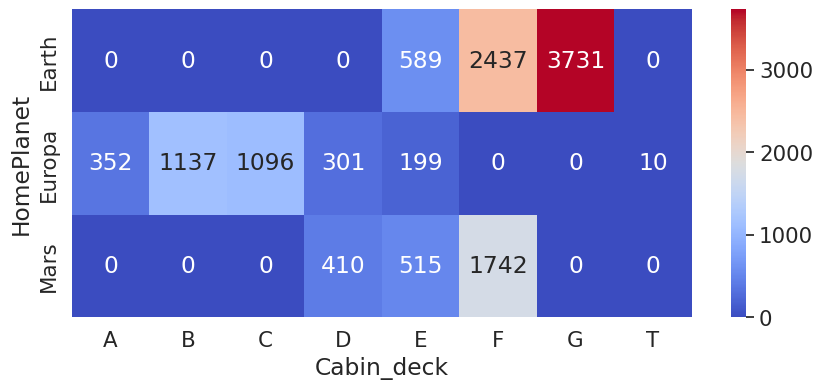

In [167]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=data.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

* Êù•Ëá™Ê¨ßÁΩóÂ∑¥ÁöÑ‰πòÂÆ¢Âú® A„ÄÅB„ÄÅC Êàñ T Â±ÇÁî≤Êùø‰∏ä„ÄÇ
* Êù•Ëá™Âú∞ÁêÉÁöÑ‰πòÂÆ¢Âú® G Â±ÇÁî≤Êùø‰∏ä„ÄÇ
* Êù•Ëá™Â§ö‰∏™Ë°åÊòüÁöÑ‰πòÂÆ¢Âú® D„ÄÅE Êàñ F Â±ÇÁî≤Êùø‰∏ä„ÄÇ

Âà©Áî®ËøôÊ†∑ÁöÑ‰∏Ä‰∏™ËßÑÂæãÊàë‰ª¨ÂèØ‰ª•Â∞ÜA,B,C,T,GÁî≤Êùø‰∏äÊØçÊòüÁº∫Â§±ÁöÑÁªôÂ°´Ë°•‰∏ä

In [168]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


**ÊØçÊòüÂíåÂßì**

ËÆæÊÉ≥Âêå‰∏Ä‰∏™ÂßìÁöÑÂèàÂèØËÉΩÊòØÂêå‰∏Ä‰∏™ÂÆ∂Â∫≠ÁöÑÔºåËÄåÂêå‰∏Ä‰∏™ÂÆ∂Â∫≠Ê≥®ÂÆö‰ºöÊù•Ëá™Âêå‰∏Ä‰∏™ÊòüÁêÉÔºå‰∏∫‰∫ÜÈ™åËØÅÁåúÊÉ≥ÂÖàÊù•ÂÅöÂõæÁúãÁúã

In [169]:
# Joint distribution of Surname and HomePlanet
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')

Text(0.5, 1.0, 'Number of unique planets per surname')

In [170]:
# Joint distribution of Surname and HomePlanet
SHP_gb = data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

#Â±ïÁ§∫ÂàÜÁªÑÂêéÁöÑÊï∞ÊçÆ
SHP_gb.head()

HomePlanet  Earth  Europa  Mars
Surname                        
Acobson       5.0     0.0   0.0
Acobsond      8.0     0.0   0.0
Adavisons    10.0     0.0   0.0
Adkinson      4.0     0.0   0.0
Admingried    0.0     4.0   0.0

In [171]:
# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb >= 1).sum(axis=1))
plt.title('Number of unique planets per surname')

# ËÆæÁΩÆÊ®™ÂùêÊ†áËΩ¥‰∏äÁöÑÊï∞ÂÄºÂíåÊ†áÁ≠æ
plt.xticks(rotation=45)
plt.xlabel('Number of unique planets')
plt.ylabel('Number of surnames')

Text(0, 0.5, 'Number of surnames')

In [172]:
# ËæìÂá∫‰∏Ä‰∏™ÊúâÂ§ö‰∏™ÊòüÁêÉÁöÑÂßìÊ∞èÁöÑ‰∏™Êï∞
print('Number of surnames with more than one planet:',((SHP_gb>0).sum(axis=1)>1).sum())

Number of surnames with more than one planet: 0


ÁªºÂêà‰∏äÈù¢‰ø°ÊÅØÂèØ‰ª•ÂæóÁü•Âêå‰∏Ä‰∏™ÂßìÊ∞èÁöÑÈÉΩÊù•Ëá™Âêå‰∏Ä‰∏™ÊòüÁêÉÔºåÂõ†Ê≠§ÔºåÊàë‰ª¨ÂèØ‰ª•Âà©Áî®ÂßìÊ∞èÂØπ‰∫éÊù•Ëá™ÁöÑÊòüÁêÉËøõË°åÂ°´ÂÖÖ

In [173]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding missing values
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


Áé∞Âú®Êù•Ëá™ÊòüÁêÉÊï∞ÊçÆÁº∫Â§±Â∞±Âè™Êúâ10‰∏™‰∫ÜÔºÅ

Êó¢ÁÑ∂Âè™Êúâ10‰∏™ÈÇ£‰πàÊàë‰ª¨‰∏çÂ¶®Êù•ÁúãÁúãÂâ©‰∏ãÁöÑÊòØ‰ªÄ‰πà

In [174]:
# Êü•ÁúãËøòÊ≤°ÊúâË¢´Â§ÑÁêÜÁöÑ10‰∏™Êï∞ÊçÆ
data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination']]

PassengerId HomePlanet  Destination
2274      2443_01        NaN  TRAPPIST-1e
2631      2817_01        NaN  TRAPPIST-1e
3091      3331_01        NaN  TRAPPIST-1e
4548      4840_01        NaN  TRAPPIST-1e
5762      6108_01        NaN  TRAPPIST-1e
8969      0616_01        NaN  TRAPPIST-1e
10583     4052_01        NaN  TRAPPIST-1e
11913     7065_01        NaN  TRAPPIST-1e
12551     8435_01        NaN  TRAPPIST-1e
12725     8775_01        NaN  TRAPPIST-1e

In [175]:
# Êü•ÁúãËøòÊ≤°ÊúâË¢´Â§ÑÁêÜÁöÑ10‰∏™Êï∞ÊçÆ
data[data['HomePlanet'].isna()]

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
2274      2443_01        NaN     False  TRAPPIST-1e  31.0  False       1458.0   
2631      2817_01        NaN     False  TRAPPIST-1e  25.0  False        237.0   
3091      3331_01        NaN     False  TRAPPIST-1e  40.0  False        666.0   
4548      4840_01        NaN      True  TRAPPIST-1e  36.0  False          0.0   
5762      6108_01        NaN     False  TRAPPIST-1e  13.0  False        206.0   
8969      0616_01        NaN     False  TRAPPIST-1e  31.0  False          0.0   
10583     4052_01        NaN     False  TRAPPIST-1e  26.0  False          6.0   
11913     7065_01        NaN      True  TRAPPIST-1e  28.0  False          0.0   
12551     8435_01        NaN       NaN  TRAPPIST-1e  19.0  False        162.0   
12725     8775_01        NaN      True  TRAPPIST-1e  40.0  False          0.0   

       FoodCourt  ShoppingMall     Spa  ...  Cabin_side Cabin_region1  \
2274       421.0          76.0     0.0  ...           P             1   
2631         0.0         910.0     0.0  ...           P             0   
3091         4.0          83.0     0.0  ...           S             0   
4548         0.0           NaN     0.0  ...           S             0   
5762        28.0           0.0     1.0  ...           S             0   
8969       428.0           NaN  1154.0  ...           S             1   
10583     5903.0           0.0   240.0  ...           P             1   
11913        0.0           0.0     0.0  ...           S             0   
12551       11.0           0.0     0.0  ...           P             0   
12725        0.0           0.0     0.0  ...           P             1   

       Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
2274               0              0              0              0   
2631               1              0              0              0   
3091               0              1              0              0   
4548               0              0              1              0   
5762               0              0              1              0   
8969               0              0              0              0   
10583              0              0              0              0   
11913              1              0              0              0   
12551              0              0              0              0   
12725              0              0              0              0   

       Cabin_region6 Cabin_region7     Surname Family_size  
2274               0             0         NaN         NaN  
2631               0             0       Sutty         1.0  
3091               0             0         NaN         NaN  
4548               0             0         NaN         NaN  
5762               0             0         NaN         NaN  
8969               0             0     Spriney         1.0  
10583              0             0  Coneveseng         1.0  
11913              0             0   Maltorted         2.0  
12551              1             0         NaN         NaN  
12725              0             0   Maltorted         2.0  

[10 rows x 29 columns]

ÊâÄÊúâÂâ©‰∏ãÁöÑ‰∫∫ÈÉΩÊòØÂâçÂæÄTRAPPIST-1eÁöÑÔºåÊâÄ‰ª•Êàë‰ª¨Êù•ÁúãÁúãÁõÆÁöÑÂú∞ÂíåÊØçÊòü‰πãÈó¥ÁöÑËÅîÁ≥ª

**ÁõÆÁöÑÂú∞ÂíåÊØçÊòü**

<AxesSubplot: xlabel='HomePlanet', ylabel='Destination'>

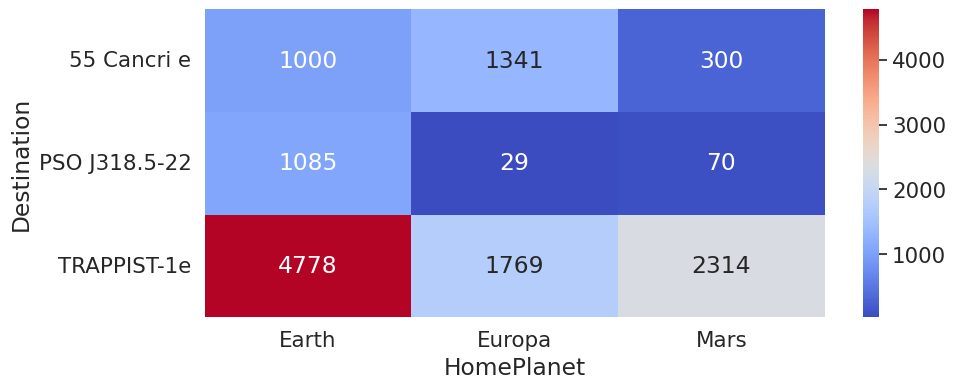

In [176]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

Â§ßÂ§öÊï∞ÂâçÂæÄTRAPPIST-1eÁöÑ‰∫∫Êù•Ëá™Âú∞ÁêÉÔºåÂõ†Ê≠§ÁåúÊµã‰ªñ‰ª¨Êù•Ëá™ÈÇ£ÈáåÊòØÊúâÈÅìÁêÜÁöÑ„ÄÇ‰ΩÜËØ∑ËÆ∞‰Ωè‰πãÂâçÊèêÂà∞ÁöÑÔºåÊ≤°Êúâ‰∫∫Êù•Ëá™Âú∞ÁêÉÁöÑDÂ±ÇÁî≤ÊùøÔºåÊâÄ‰ª•Êàë‰ª¨ÈúÄË¶ÅÂ∞ÜÂÆÉ‰ª¨ËøáÊª§Êéâ„ÄÇ

In [177]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


ËøêÊ∞î‰∏çÈîôÔºåÁé∞Âú®ÊâÄÊúâÁöÑÊØçÊòüÁöÑÁº∫Â§±ÂÄºÈÉΩË°•‰∏ä‰∫Ü

**ÂßìÊ∞èÂíåÊâÄÂú®ÁöÑÁªÑ**

ÂÖàÊù•ÁúãÁúãÂßìÊòØ‰∏çÊòØÂíå‰πãÂâçÊúâÁõ∏ÂêåÁöÑËßÑÂæãÊØè‰∏™ÂßìÈÉΩË¢´ÂàÜÂú®‰∏Ä‰∏™ÁªÑ

In [178]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_side Cabin_region1  \
0        0.0           0.0     0.0  ...           P             1   
1        9.0          25.0   549.0  ...           S             1   
2     3576.0           0.0  6715.0  ...           S             1   
3     1283.0         371.0  3329.0  ...           S             1   
4       70.0         151.0   565.0  ...           S             1   

   Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  Cabin_region6  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

  Cabin_region7      Surname Family_size  
0             0    Ofracculy         3.0  
1             0        Vines         4.0  
2             0       Susent         7.0  
3             0       Susent         7.0  
4             0  Santantines         9.0  

[5 rows x 29 columns]

In [179]:
# Joint distribution of Group and Surname
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)


In [180]:
GSN_gb.head()

Surname  Acobson  Acobsond  Adavisons  Admingried  Aginge  Ailled  Aillyber  \
Group                                                                         
3            0.0       0.0        0.0         0.0     0.0     0.0       0.0   
6            0.0       0.0        0.0         0.0     0.0     0.0       0.0   
8            0.0       0.0        0.0         0.0     0.0     0.0       0.0   
17           0.0       0.0        0.0         0.0     0.0     0.0       0.0   
20           0.0       0.0        0.0         0.0     0.0     0.0       0.0   

Surname  Ainatint  Aindlylid  Ainserfle  ...  Woody  Wooes  Wooterston  \
Group                                    ...                             
3             0.0        0.0        0.0  ...    0.0    0.0         0.0   
6             0.0        0.0        0.0  ...    0.0    0.0         0.0   
8             0.0        0.0        0.0  ...    0.0    0.0         0.0   
17            0.0        0.0        0.0  ...    0.0    0.0         0.0   
20            0.0        0.0        0.0  ...    0.0    0.0         0.0   

Surname  Workmans  Workmanson  Wriggins  Yanton  Yatters  Yorkland  Youngrayes  
Group                                                                           
3             0.0         0.0       0.0     0.0      0.0       0.0         0.0  
6             0.0         0.0       0.0     0.0      0.0       0.0         0.0  
8             0.0         0.0       0.0     0.0      0.0       0.0         0.0  
17            0.0         0.0       0.0     0.0      0.0       0.0         0.0  
20            0.0         0.0       0.0     0.0      0.0       0.0         0.0  

[5 rows x 1631 columns]

In [181]:
GSN_gb.shape

(2135, 1631)

In [182]:
# Êü•ÁúãGSB_gb‰∏≠ÁöÑÊï∞ÊçÆ‰∏ç‰∏∫0ÁöÑÂÄºÁöÑ‰∏™Êï∞
(GSN_gb>0).sum(axis=1).value_counts()

1    1769
2     322
3      43
4       1
dtype: int64

In [183]:
#ÁªüËÆ°ÊØèË°å‰∏ç‰∏∫0ÁöÑ‰∏™Êï∞
GSN_gb['count']=(GSN_gb>0).sum(axis=1)

In [184]:
GSN_gb.head()

Surname  Acobson  Acobsond  Adavisons  Admingried  Aginge  Ailled  Aillyber  \
Group                                                                         
3            0.0       0.0        0.0         0.0     0.0     0.0       0.0   
6            0.0       0.0        0.0         0.0     0.0     0.0       0.0   
8            0.0       0.0        0.0         0.0     0.0     0.0       0.0   
17           0.0       0.0        0.0         0.0     0.0     0.0       0.0   
20           0.0       0.0        0.0         0.0     0.0     0.0       0.0   

Surname  Ainatint  Aindlylid  Ainserfle  ...  Wooes  Wooterston  Workmans  \
Group                                    ...                                
3             0.0        0.0        0.0  ...    0.0         0.0       0.0   
6             0.0        0.0        0.0  ...    0.0         0.0       0.0   
8             0.0        0.0        0.0  ...    0.0         0.0       0.0   
17            0.0        0.0        0.0  ...    0.0         0.0       0.0   
20            0.0        0.0        0.0  ...    0.0         0.0       0.0   

Surname  Workmanson  Wriggins  Yanton  Yatters  Yorkland  Youngrayes  count  
Group                                                                        
3               0.0       0.0     0.0      0.0       0.0         0.0      1  
6               0.0       0.0     0.0      0.0       0.0         0.0      1  
8               0.0       0.0     0.0      0.0       0.0         0.0      1  
17              0.0       0.0     0.0      0.0       0.0         0.0      1  
20              0.0       0.0     0.0      0.0       0.0         0.0      3  

[5 rows x 1632 columns]

In [185]:
GSN_gb['count'].value_counts()

1    1769
2     322
3      43
4       1
Name: count, dtype: int64

Â•ΩÂÉèÊääË°åÂè∑ÈÇ£‰∏ÄÂàóÂú®ÁªüËÆ°ÁöÑÊó∂ÂÄô‰πüÁÆóËøõÂéª‰∫ÜÔºåËµ∂Á¥ßÂÅö‰∏™‰øÆÊ≠£

In [186]:
#countÂàó‰∏≠ÊâÄÊúâÁöÑÂÄº-1
GSN_gb['count']=GSN_gb['count']-1

In [187]:
GSN_gb['count'].value_counts()

0    1769
1     322
2      43
3       1
Name: count, dtype: int64

In [188]:
# sns‰∏ÄÁõ¥Âá∫bugÊàëËá™Â∑±ÊâãÂä®ÁîªÂêß


x_values = [1, 2, 3, 4]
y_values = [1769, 322, 43, 1]
colors = ['red', 'green', 'blue', 'orange']

plt.bar(x_values, y_values, color=colors)
plt.xlabel('Different Surname')
plt.ylabel('Frequency')
plt.title('Number of unique surnames by group')

plt.show()


Â§ßÂ§öÊï∞Ôºà83%ÔºâÁöÑÁæ§ÁªÑÂè™ÂåÖÂê´‰∏Ä‰∏™ÂÆ∂Â∫≠„ÄÇÂõ†Ê≠§ÔºåËÆ©Êàë‰ª¨Ê†πÊçÆËØ•Áæ§ÁªÑ‰∏≠ÁöÑÂ§ßÂ§öÊï∞ÂßìÊ∞èÊù•Â°´ÂÖÖÁº∫Â§±ÁöÑÂßìÊ∞è„ÄÇ

In [189]:
# Missing values before
SN_bef=data['Surname'].isna().sum()

# Passengers with missing Surname and in a group with known majority Surname
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

# Fill corresponding missing values
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


ËøôÊòØÊàë‰ª¨ËÉΩÂÅöÁöÑÊúÄÂ•ΩÁöÑÂ§ÑÁêÜÊñπÂºè‰∫Ü„ÄÇÊàë‰ª¨‰∏çÂøÖÂéªÈô§ÊâÄÊúâËøô‰∫õÁº∫Â§±ÂÄºÔºåÂõ†‰∏∫ÊúÄÁªàÊàë‰ª¨‰ºöÂà†Èô§ÂßìÊ∞èÁâπÂæÅ„ÄÇÁÑ∂ËÄåÔºåÊàë‰ª¨ÂèØ‰ª•Êõ¥Êñ∞ÂÆ∂Â∫≠Â§ßÂ∞èÁâπÂæÅ„ÄÇ

In [190]:
# Replace NaN's with outliers (so we can use map)
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# Say unknown surname means no family
data.loc[data['Family_size']>100,'Family_size']=0

**Áî≤Êùø‰ΩçÁΩÆÂíåÁªÑÂè∑**

In [191]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

In [192]:
GCD_gb.head()

Cabin_deck    A    B    C    D    E    F    G    T
Group                                             
3           2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
8           0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
17          0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
20          0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0

In [193]:
print(GCD_gb.index)

Int64Index([   3,    6,    8,   17,   20,   31,   32,   40,   44,   45,
            ...
            9220, 9227, 9231, 9238, 9252, 9266, 9267, 9272, 9275, 9280],
           dtype='int64', name='Group', length=2134)


In [194]:
# ÈáçÊñ∞ËÆæÁΩÆÁ¥¢Âºï
GCD_gb.reset_index(drop=True, inplace=True)

In [195]:
print(GCD_gb.index)

RangeIndex(start=0, stop=2134, step=1)


In [196]:
GCD_gb.head()

Cabin_deck    A    B    C    D    E    F    G    T
0           2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
2           0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
3           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
4           0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0

In [197]:
GCD_gb['count']=(GCD_gb>0).sum(axis=1)

In [198]:
GCD_gb.head()

Cabin_deck    A    B    C    D    E    F    G    T  count
0           2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1
1           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0      2
2           0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0      1
3           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0      2
4           0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0      1

In [199]:
GCD_gb['count']=GCD_gb['count']-1

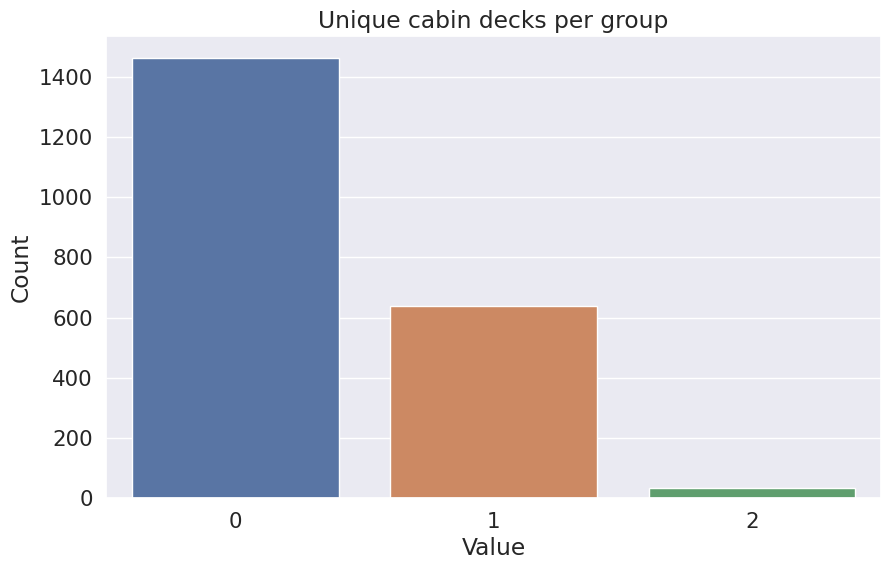

In [200]:
# ÁªüËÆ°‰∏çÂêåÂÄºÁöÑ‰∏™Êï∞
value_counts = GCD_gb['count'].value_counts()

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Unique cabin decks per group')
plt.show()


In [201]:
GCD_gb.head()

Cabin_deck    A    B    C    D    E    F    G    T  count
0           2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0
1           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0      1
2           0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0      0
3           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0      1
4           0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0      0

In [202]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_side Cabin_region1  \
0        0.0           0.0     0.0  ...           P             1   
1        9.0          25.0   549.0  ...           S             1   
2     3576.0           0.0  6715.0  ...           S             1   
3     1283.0         371.0  3329.0  ...           S             1   
4       70.0         151.0   565.0  ...           S             1   

   Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  Cabin_region6  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

  Cabin_region7      Surname Family_size  
0             0    Ofracculy           4  
1             0        Vines           4  
2             0       Susent           7  
3             0       Susent           7  
4             0  Santantines           9  

[5 rows x 29 columns]

ÂØπ‰∫é‰∏äÈù¢ÁöÑÁöÑÂ§ÑÁêÜËøáÁ®ãÊàëËá™Â∑±ÁöÑÊÄùË∑ØÂ∫îËØ•Êúâ‰∏ÄÁÇπÈóÆÈ¢òÊàëÂú®‰∏ãÈù¢Êù•Êç¢‰∏Ä‰∏™ÊÄùË∑ØËøõË°å‰∏Ä‰∏ãËØïÈ™åÔºåÂ¶ÇÊûúÂèØ‰ª•ÁöÑËØùÊàëÂ∫îËØ•ÂèØ‰ª•ÂæóÂà∞ÊàëÊÉ≥Ë¶ÅÁöÑÁªìËÆ∫

In [203]:
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

In [204]:
GCD_gb.head()

Cabin_deck    A    B    C    D    E    F    G    T
Group                                             
3           2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6           0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
8           0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
17          0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
20          0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0

In [205]:
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

In [206]:
GCS_gb.head()

Cabin_side    P    S
Group               
3           0.0  2.0
6           0.0  2.0
8           3.0  0.0
17          2.0  0.0
20          0.0  6.0

In [207]:
GCS_gb.shape

(2134, 2)

In [208]:
GCS_gb['count']=(GCS_gb>0).sum(axis=1)

In [209]:
GCS_gb.head()

Cabin_side    P    S  count
Group                      
3           0.0  2.0      1
6           0.0  2.0      1
8           3.0  0.0      1
17          2.0  0.0      1
20          0.0  6.0      1

In [210]:
GCS_gb['count']=GCS_gb['count']-1

In [211]:
GCS_gb.head()

Cabin_side    P    S  count
Group                      
3           0.0  2.0      0
6           0.0  2.0      0
8           3.0  0.0      0
17          2.0  0.0      0
20          0.0  6.0      0

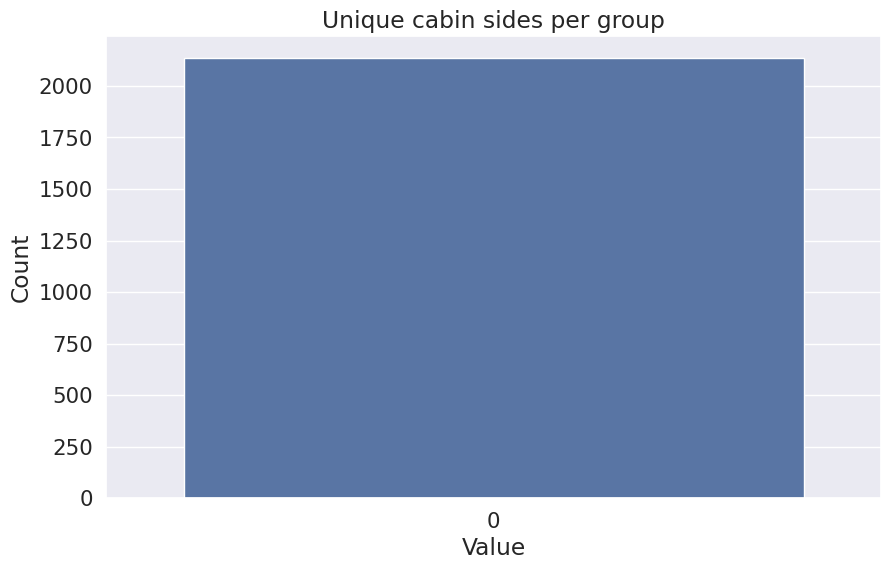

In [212]:
# ÁªüËÆ°‰∏çÂêåÂÄºÁöÑ‰∏™Êï∞
value_counts = GCS_gb['count'].value_counts()

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Unique cabin sides per group')
plt.show()

ÂèØ‰ª•ÁúãÂà∞ÊâÄÊúâÁöÑÁõ∏ÂêåÁªÑÁöÑ‰∫∫ÈÉΩÂú®Áî≤ÊùøÁõ∏ÂêåÁöÑsideÔºåÂõ†Ê≠§ÂèØ‰ª•Âà©Áî®ËøôÊ†∑‰∏ÄÁÇπÊù•Ë°•ÂÖÖÊâÄÂú®Áî≤ÊùøÁöÑ‰ΩçÁΩÆ

In [213]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


**Áî≤ÊùøsideÂíåÂßìÊ∞è‰πãÈó¥ÁöÑÂÖ≥Á≥ª**

Text(0.5, 1.0, 'Ratio of cabin side by surname')

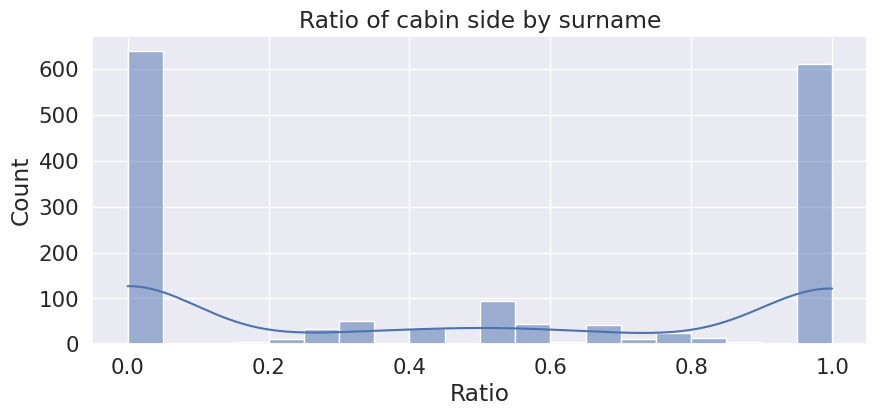

In [214]:
# Joint distribution of Surname and Cabin side
SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Ratio of sides
SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

# Histogram of ratio
plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of cabin side by surname')

In [215]:
# Print proportion
print('ÂÆ∂Â∫≠ÊàêÂëòÂú®Âêå‰∏Ä‰æßÊâÄÂç†ÁöÑÁôæÂàÜÊØî', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

ÂÆ∂Â∫≠ÊàêÂëòÂú®Âêå‰∏Ä‰æßÊâÄÂç†ÁöÑÁôæÂàÜÊØî 76.7 %


Cabin_side    P    S  Ratio
Surname                    
Acobson     0.0  3.0    0.0
Acobsond    3.0  0.0    1.0
Adavisons   6.0  0.0    1.0
Admingried  0.0  4.0    0.0
Aginge      3.0  0.0    1.0

ËøôË°®ÊòéÂÆ∂Â∫≠ÊàêÂëòÂÄæÂêë‰∫éÂú®Âêå‰∏Ä‰æßÁöÑËà±‰Ωç‰∏äÔºà77% ÁöÑÂÆ∂Â∫≠ÊàêÂëòÂÆåÂÖ®Âú®Âêå‰∏Ä‰æßÔºâ„ÄÇ
Âõ†Ê≠§Êàë‰ª¨Âà©Áî®ËøôÊ†∑ÁöÑËßÑÂæãÊù•Âº•Ë°•Áº∫Â§±ÂÄº

In [216]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
data.drop('Surname', axis=1, inplace=True)

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 162
#Cabin_side missing values after: 66


Ââ©‰∏ãÁöÑÁº∫Â§±ÂÄºÂ∞ÜË¢´ÊõøÊç¢‰∏∫ÂºÇÂ∏∏ÂÄº„ÄÇËøôÊòØÂõ†‰∏∫Êàë‰ª¨ÂÆûÈôÖ‰∏ä‰∏çÁü•ÈÅìÂ∫îËØ•Â∞ÜËøô‰∏§‰∏™ÔºàÂπ≥Ë°°ÁöÑÔºâ‰æßÈù¢‰∏≠ÁöÑÂì™‰∏Ä‰∏™ÂàÜÈÖçÁªôÁº∫Â§±ÂÄº„ÄÇ

In [217]:
# Value counts
data['Cabin_side'].value_counts()

S    6504
P    6400
Name: Cabin_side, dtype: int64

‰∏ãÈù¢Â∞±ÂÖàÊääËøôÈáåÈù¢ÂÖ®ÈÉ®Â°´‰∏äÂºÇÂ∏∏ÂÄºZÔºåÂ¶ÇÊûúÂêéÈù¢ÊúâÂäûÊ≥ïÂÜçËß£ÂÜ≥Âêß# Missing values before

In [218]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 66
#Cabin_side missing values after: 0


**ÊâÄÂú®ÁöÑËàπËà±Áî≤ÊùøÂíåÂàÜÁªÑ**

‰πãÂâçÁöÑÂàÜÊûê‰∏≠ÊèêÂà∞ËøáÊù•Ëá™Áõ∏ÂêåÂÆ∂Â∫≠ÁöÑÊàê‰∏ÄÂçäÂú®Âêå‰∏Ä‰∏™ÂàÜÁªÑÂΩì‰∏≠ÔºåÂà©Áî®ËøôÊ†∑ÁöÑ‰∏Ä‰∏™ËßÑÂæãÂÖàÊù•ËøõË°åÂ°´ÂÖÖ‰∏Ä‰∏ã

In [219]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 299
#Cabin_deck missing values after: 162


**Áî≤ÊùøÂíåÊù•Ëá™ÁöÑÊòüÁêÉ**

In [220]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
0        0.0           0.0     0.0  ...           0.0          P   
1        9.0          25.0   549.0  ...           0.0          S   
2     3576.0           0.0  6715.0  ...           0.0          S   
3     1283.0         371.0  3329.0  ...           0.0          S   
4       70.0         151.0   565.0  ...           1.0          S   

   Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

  Cabin_region6  Cabin_region7 Family_size  
0             0              0           4  
1             0              0           4  
2             0              0           7  
3             0              0           7  
4             0              0           9  

[5 rows x 28 columns]

In [221]:
# Joint distribution
data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  128.0   425.0   
                         1       0.0    0.0    0.0    0.0  343.0  1310.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     148.0  445.0  414.0  119.0   51.0     0.0   
                         1      43.0  170.0  194.0   82.0   78.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  161.0  211.0   775.0   
                         1       0.0    0.0    0.0  159.0  262.0   722.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1046.0  0.0  
                         1     1462.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

***ËßÇÂØüÊï∞ÊçÆÊàë‰ª¨ÂèØ‰ª•ÂæóÂà∞‰∏ãÈù¢ÁöÑÁªìËÆ∫***
- ÁÅ´ÊòüÁöÑ‰πòÂÆ¢ÊúÄÊúâÂèØËÉΩÂú® F Â±ÇÁî≤Êùø‰∏ä„ÄÇ
- Ê¨ßÁΩóÂ∑¥ÁöÑ‰πòÂÆ¢ÔºàÂ§ßËá¥‰∏äÔºâÂ¶ÇÊûúÊòØÁã¨Ëá™ÊóÖË°åÔºåÂàôÊúÄÊúâÂèØËÉΩÂú® C Â±ÇÁî≤Êùø‰∏äÔºåÂê¶ÂàôÂèØËÉΩÂú® B Â±ÇÁî≤Êùø‰∏ä„ÄÇ
- Âú∞ÁêÉÁöÑ‰πòÂÆ¢ÔºàÂ§ßËá¥‰∏äÔºâÊúÄÊúâÂèØËÉΩÂú® G Â±ÇÁî≤Êùø‰∏ä„ÄÇ

Âà©Áî®‰∏äÈù¢ÂèëÁé∞ÁöÑËøô‰∫õËßÑÂæãÊàë‰ª¨Êù•ÂØπ‰∫éÁº∫Â§±ÁöÑÁî≤ÊùøÁöÑÊï∞ÊçÆËøõË°åÂ°´ÂÖÖ

In [222]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 162
#Cabin_deck missing values after: 2


In [223]:
# Â±ïÁ§∫cabin_deckÁº∫Â§±ÁöÑÊï∞ÊçÆ
data[data['Cabin_deck'].isna()]

PassengerId HomePlanet CryoSleep Destination   Age    VIP  RoomService  \
5710     6048_01       Mars      True         NaN  25.0  False          0.0   
6112     6451_01       Mars     False         NaN  37.0  False        610.0   

      FoodCourt  ShoppingMall    Spa  ...  Cabin_number Cabin_side  \
5710        0.0           0.0    0.0  ...           NaN          S   
6112        NaN         410.0  148.0  ...           NaN          Z   

      Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  \
5710              0              0              0              0   
6112              0              0              0              0   

      Cabin_region5 Cabin_region6  Cabin_region7 Family_size  
5710              0             0              0           8  
6112              0             0              0           4  

[2 rows x 28 columns]

In [224]:
data.dtypes

PassengerId       object
HomePlanet        object
CryoSleep         object
Destination       object
Age              float64
VIP               object
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Age_group         object
Expenditure      float64
No_spending        int64
Group              int64
Group_size         int64
Solo               int64
Cabin_deck        object
Cabin_number     float64
Cabin_side        object
Cabin_region1      int64
Cabin_region2      int64
Cabin_region3      int64
Cabin_region4      int64
Cabin_region5      int64
Cabin_region6      int64
Cabin_region7      int64
Family_size        int64
dtype: object

In [225]:
print(data['Cabin_deck'])

0        B
1        F
2        A
3        A
4        F
        ..
12965    G
12966    G
12967    D
12968    D
12969    G
Name: Cabin_deck, Length: 12970, dtype: object


In [226]:
# ÊääÁº∫Â§±ÁöÑcabin_deckÁî®FÂ°´ÂÖÖ
data.loc[data['Cabin_deck'].isna(),'Cabin_deck']='F'

In [227]:
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values after: 0


**CabinNumber and CabinDeck**

Text(0.5, 1.0, 'Cabin_number vs group coloured by group')

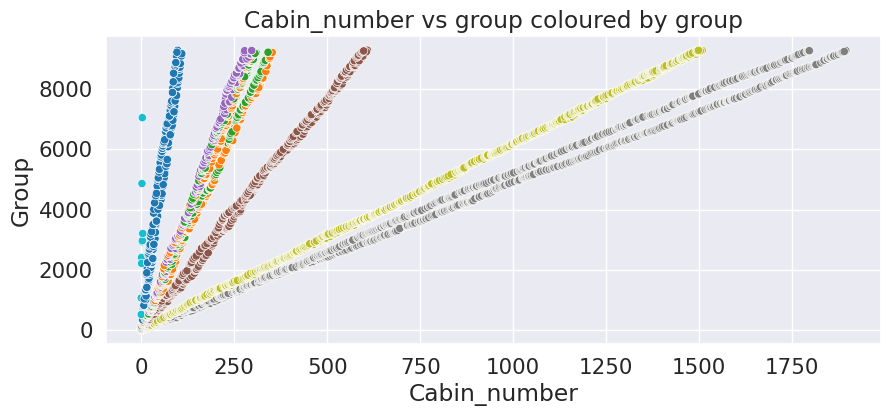

In [228]:
# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Cabin_number'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
plt.title('Cabin_number vs group coloured by group')

ËøôÈáåÂ≠òÂú®‰∏Ä‰∏™ÊúâË∂£ÁöÑÊ®°Âºè„ÄÇËà±‰ΩçÂè∑ÂíåÁªÑÂè∑Âú®ÊØè‰∏™Áî≤Êùø‰∏äÂÖ±‰∫´Á∫øÊÄßÂÖ≥Á≥ª„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂú®ÊØè‰∏™Áî≤Êùø‰∏ä‰ΩøÁî®Á∫øÊÄßÂõûÂΩíÊù•Êé®Êñ≠Áº∫Â§±ÁöÑËà±‰ΩçÂè∑Ôºå‰ª•Ëé∑Âæó‰∏Ä‰∏™Ëøë‰ººÁöÑËà±‰ΩçÂè∑„ÄÇ

In [229]:
# Missing values before
CN_bef=data['Cabin_number'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
    X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']

    # Linear regression
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

# Print number of missing values left
print('#Cabin_number missing values before:',CN_bef)
print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())

#Cabin_number missing values before: 299
#Cabin_number missing values after: 0


Âú®Ë°•ÂÖ®Áº∫Â§±‰πãÂêéÊù•Êõ¥Êñ∞‰∏Ä‰∏ãÁî≤ÊùøÁöÑÂàÜÁªÑ

In [230]:
# One-hot encode cabin regions
data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

In [231]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
0        0.0           0.0     0.0  ...           0.0          P   
1        9.0          25.0   549.0  ...           0.0          S   
2     3576.0           0.0  6715.0  ...           0.0          S   
3     1283.0         371.0  3329.0  ...           0.0          S   
4       70.0         151.0   565.0  ...           1.0          S   

   Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

  Cabin_region6  Cabin_region7 Family_size  
0             0              0           4  
1             0              0           4  
2             0              0           7  
3             0              0           7  
4             0              0           9  

[5 rows x 28 columns]

**VIP**

In [232]:
data['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

Áî±Ê≠§ÂèØËßÅVIPÊòØ‰∏Ä‰∏™ÈùûÂ∏∏‰∏çÂπ≥Ë°°ÁöÑÈáèÔºåÊòØVIPÁöÑ‰∫∫ÂÖ∂ÂÆûÂè™Âç†ÊçÆ‰∫ÜÊûÅÂ∞ëÊï∞ÔºåÂõ†Ê≠§Êàë‰ª¨ÂáÜÁ°ÆÁéáÊúÄÈ´òÁöÑÊñπÊ≥ïÂÖ∂ÂÆûÂ∞±ÊòØÊääÁº∫Â§±ÁöÑÂÖ®ÈÉ®Ê†áËÆ∞Êàê‰∏∫‰∏çÊòØVIP

In [233]:
# Missing values before
V_bef=data['VIP'].isna().sum()

# Fill missing values with mode
data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 0


**Âπ¥ÈæÑ**

In [234]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
0        0.0           0.0     0.0  ...           0.0          P   
1        9.0          25.0   549.0  ...           0.0          S   
2     3576.0           0.0  6715.0  ...           0.0          S   
3     1283.0         371.0  3329.0  ...           0.0          S   
4       70.0         151.0   565.0  ...           1.0          S   

   Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

  Cabin_region6  Cabin_region7 Family_size  
0             0              0           4  
1             0              0           4  
2             0              0           7  
3             0              0           7  
4             0              0           9  

[5 rows x 28 columns]

In [235]:
# Joint distribution
data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

Âπ¥ÈæÑÂú®ÂÆ∂‰π°ÊòüÁêÉ„ÄÅÂõ¢ÈòüËßÑÊ®°„ÄÅËä±Ë¥πÂíåËà±‰ΩçÁî≤ÊùøÁ≠âËÆ∏Â§öÁâπÂæÅ‰∏äÈÉΩÂ≠òÂú®ÂèòÂåñÔºåÂõ†Ê≠§Êàë‰ª¨Â∞ÜÊ†πÊçÆËøô‰∫õÂ≠êÁªÑÁöÑ‰∏≠‰ΩçÊï∞Êù•Â°´Ë°•Áº∫Â§±ÂÄº„ÄÇ

In [236]:
# Missing values before
A_bef=data[exp_feats].isna().sum().sum()

# Fill missing values using the median
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


Áî®Êñ∞ÁöÑÊï∞ÊçÆÊù•Êõ¥Êñ∞‰πãÂâçÁöÑÂπ¥ÈæÑÊÆµÂàÜÁªÑ

In [237]:
# Update age group feature
data.loc[data['Age']<=12,'Age_group']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
data.loc[data['Age']>50,'Age_group']='Age_51+'

ÊòØÂê¶Âú®ÂÜ¨Áú†

Â¶ÇÊûú‰∏Ä‰∏™‰πòÂÆ¢Ê≤°ÊúâÊ∂àË¥πËÆ∞ÂΩïÈÇ£‰ªñÂ§ßÊ¶ÇÁéá‰ºöÂú®ÂÜ¨Áú†ÔºåÂ¶ÇÊûúÊúâÊ∂àË¥πËÆ∞ÂΩïÔºåÈÇ£Âú®ÂÜ¨Áú†ÁöÑÂèØËÉΩÊÄßÂÖ∂ÂÆûÂ∞±‰∏çÂ§ß

In [238]:
# Joint distribution
data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep     False   True 
No_spending                
0            7339.0     0.0
1             740.0  4581.0

In [239]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


**Ê∂àË¥πÂíåÂÜ¨Áú†‰πãÈó¥ÁöÑÂÖ≥Á≥ª**

ÂÖàÊù•È™åËØÅ‰∏Ä‰∏ãÊàë‰ª¨‰πãÂâçÁöÑÁåúÊÉ≥ÊòØÊ≤°ÊúâÈîôÁöÑÔºå‰πüÂ∞±ÊòØËØ¥ÂÜ¨Áú†ÁöÑ‰∫∫ÊòØÊ≤°ÊúâÊ∂àË¥πÁöÑ

In [240]:
print('ÂÜ¨Áú†‰πòÂÆ¢ÁöÑÊúÄÂ§ßÊ∂àË¥π:',data.loc[data['CryoSleep']==True,exp_feats].sum(axis=1).max())

ÂÜ¨Áú†‰πòÂÆ¢ÁöÑÊúÄÂ§ßÊ∂àË¥π: 0.0


ÈùûÂ∏∏Â•ΩÁöÑÁªìÊûúÔºåÊÅ∞Â•ΩÁ¨¶ÂêàÊàë‰ª¨‰πãÂâçÁöÑÁåúÊÉ≥

In [241]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()

# CryoSleep has no expenditure
for col in exp_feats:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


Ëä±Ë¥πÂú®ËÆ∏Â§öÁâπÂæÅ‰∏äÂ≠òÂú®Â∑ÆÂºÇÔºå‰ΩÜÊàë‰ª¨Âè™‰ºö‰ΩøÁî®ÂÆ∂‰π°ÊòüÁêÉ„ÄÅÁã¨Ëá™ÊóÖË°å‰ª•ÂèäÂπ¥ÈæÑÁªÑÊù•Â°´Ë°•Áº∫Â§±ÂÄºÔºå‰ª•Èò≤Ê≠¢ËøáÊãüÂêà„ÄÇÊàë‰ª¨ËøòÂ∞Ü‰ΩøÁî®Âπ≥ÂùáÂÄºËÄå‰∏çÊòØ‰∏≠‰ΩçÊï∞ÔºåÂõ†‰∏∫ÂæàÂ§ß‰∏ÄÈÉ®ÂàÜ‰πòÂÆ¢Ê≤°ÊúâËä±Ë¥πÔºå‰∏≠‰ΩçÊï∞ÈÄöÂ∏∏‰∏∫0„ÄÇËØ∑Ê≥®ÊÑèÔºåÂπ¥ÈæÑÂú®12Â≤Å‰ª•‰∏ãÁöÑ‰∫∫‰∏ç‰ºöÊúâ‰ªª‰ΩïËä±Ë¥π„ÄÇ

In [242]:
# Joint distribution
data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)

Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   724.902222   789.700555   841.093596   736.655773   
           1          0.0   693.014898   779.395942   795.420690   794.818627   
Europa     0          0.0  1153.160256  2652.013298  3534.668246  3975.774005   
           1          0.0     0.000000  2489.888889  3806.000000  3949.939929   
Mars       0          0.0  1176.839286  1161.808333  1247.098361  1143.671916   
           1          0.0  1687.261538  1075.341146  1107.122677  1110.392045   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [243]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()

# Fill remaining missing values using the median
for col in exp_feats:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


ÊúÄÂêéÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî®Ëøô‰∫õÊñ∞ÁöÑÊï∞ÊçÆÁÇπÊõ¥Êñ∞Ëä±Ë¥πÔºàexpenditureÔºâÂíåÊó†Ëä±Ë¥πÔºàno_spendingÔºâÁâπÂæÅ„ÄÇ

In [244]:
# Update expenditure and no_spending
data['Expenditure']=data[exp_feats].sum(axis=1)
data['No_spending']=(data['Expenditure']==0).astype(int)

ÁúãÁúãÊúâÊ≤°ÊúâÊ≤°ÊúâÂ§ÑÁêÜÂÆåÁöÑÊºèÁΩë‰πãÈ±º

In [245]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination      274
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Age_group          0
Expenditure        0
No_spending        0
Group              0
Group_size         0
Solo               0
Cabin_deck         0
Cabin_number       0
Cabin_side         0
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Cabin_region5      0
Cabin_region6      0
Cabin_region7      0
Family_size        0
dtype: int64

Â•ΩÂêßËøòÊúâÁõÆÁöÑÂú∞Ê≤°ÊúâÂ§ÑÁêÜÂÆåÔºåÈÇ£Êé•ÁùÄÊù•Â§ÑÁêÜÁõÆÁöÑÂú∞Âêß

**ÁõÆÁöÑÂú∞**

In [246]:
# ËæìÂá∫Destination ‰∏≠‰∏çÂêåÂÄºÁöÑ‰∏™Êï∞
data['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [247]:
#ËæìÂá∫ ÊØè‰∏™HomePlanet Âéª‰∏çÂêåDestinationÁöÑ‰∫∫Êï∞
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)
HPD_gb.shape

(3, 3)

In [248]:
print(HPD_gb)

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth               1000           1085         4785
Europa              1341             29         1769
Mars                 300             70         2317


In [249]:
# ËæìÂá∫ÊØè‰∏™Cabin_deck Âéª‰∏çÂêåDestinationÁöÑ‰∫∫Êï∞
CDD_gb=data.groupby(['Cabin_deck','Destination'])['Destination'].size().unstack().fillna(0)
CDD_gb.shape

(8, 3)

In [250]:
print(CDD_gb)

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Cabin_deck                                          
A                  163.0            2.0        191.0
B                  518.0            5.0        615.0
C                  484.0           22.0        624.0
D                  177.0           17.0        521.0
E                  167.0           59.0       1073.0
F                  589.0          366.0       3259.0
G                  541.0          713.0       2579.0
T                    2.0            0.0          9.0


In [251]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
0        0.0           0.0     0.0  ...           0.0          P   
1        9.0          25.0   549.0  ...           0.0          S   
2     3576.0           0.0  6715.0  ...           0.0          S   
3     1283.0         371.0  3329.0  ...           0.0          S   
4       70.0         151.0   565.0  ...           1.0          S   

   Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

  Cabin_region6  Cabin_region7 Family_size  
0             0              0           4  
1             0              0           4  
2             0              0           7  
3             0              0           7  
4             0              0           9  

[5 rows x 28 columns]

In [252]:
HPD_gb=data.groupby(['HomePlanet','Cabin_deck','Destination'])['Destination'].size().unstack().fillna(0)

In [253]:
print(HPD_gb)

Destination            55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet Cabin_deck                                         
Earth      E                  67.0           43.0        471.0
           F                 392.0          329.0       1735.0
           G                 541.0          713.0       2579.0
Europa     A                 163.0            2.0        191.0
           B                 518.0            5.0        615.0
           C                 484.0           22.0        624.0
           D                 105.0            0.0        201.0
           E                  69.0            0.0        129.0
           T                   2.0            0.0          9.0
Mars       D                  72.0           17.0        320.0
           E                  31.0           16.0        473.0
           F                 197.0           37.0       1524.0


ÁúãÊù•Êó†ËÆ∫ÊÄé‰πàÂàÜÂéªTRAPPIST-1eÁöÑ‰∫∫Êï∞ÈÉΩÊòØÂ≠êÁªÑÈáåÈù¢ÊúÄÂ§öÁöÑÔºåÈÇ£Â∞±Áõ¥Êé•Â°´‰∏äÂêßÔºå‰∏çÊäòËÖæ‰∫Ü

In [254]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


In [255]:
data.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

Áº∫Â§±ÂÄºÂ§ÑÁêÜÂÆåÁªìÊííËä±üéâüéâüéâ

## È¢ÑÂ§ÑÁêÜ

**Â∞ÜÊï∞ÊçÆÂàÜÊàêËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ**

In [256]:
#ËÆ≠ÁªÉÈõÜ
X=data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
#ÊµãËØïÈõÜ
X_test=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

Âú®Â§ÑÁêÜÁº∫Â§±ÂÄº‰πãÂêéÂÜçÊù•Áúã‰∏ÄÁúºÂêÑ‰∏™Êï∞ÊçÆÁöÑÂàÜÂ∏É

In [257]:
train_age = X.copy()
test_age = X_test.copy()
train_age["type"] = "Train"
test_age["type"] = "Test"
ageDf = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

In [258]:
X.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
0        0.0           0.0     0.0  ...           0.0          P   
1        9.0          25.0   549.0  ...           0.0          S   
2     3576.0           0.0  6715.0  ...           0.0          S   
3     1283.0         371.0  3329.0  ...           0.0          S   
4       70.0         151.0   565.0  ...           1.0          S   

   Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

  Cabin_region6  Cabin_region7 Family_size  
0             0              0           4  
1             0              0           4  
2             0              0           7  
3             0              0           7  
4             0              0           9  

[5 rows x 28 columns]

In [259]:
X_test.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
8693     0013_01      Earth      True  TRAPPIST-1e  27.0  False          0.0   
8694     0018_01      Earth     False  TRAPPIST-1e  19.0  False          0.0   
8695     0019_01     Europa      True  55 Cancri e  31.0  False          0.0   
8696     0021_01     Europa     False  TRAPPIST-1e  38.0  False          0.0   
8697     0023_01      Earth     False  TRAPPIST-1e  20.0  False         10.0   

      FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
8693        0.0           0.0     0.0  ...           3.0          S   
8694        9.0           0.0  2823.0  ...           4.0          S   
8695        0.0           0.0     0.0  ...           0.0          S   
8696     6652.0           0.0   181.0  ...           1.0          S   
8697        0.0         635.0     0.0  ...           5.0          S   

      Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  \
8693              1              0              0              0   
8694              1              0              0              0   
8695              1              0              0              0   
8696              1              0              0              0   
8697              1              0              0              0   

      Cabin_region5 Cabin_region6  Cabin_region7 Family_size  
8693              0             0              0           8  
8694              0             0              0           4  
8695              0             0              0           6  
8696              0             0              0           2  
8697              0             0              0           5  

[5 rows x 28 columns]

In [260]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
0        0.0           0.0     0.0  ...           0.0          P   
1        9.0          25.0   549.0  ...           0.0          S   
2     3576.0           0.0  6715.0  ...           0.0          S   
3     1283.0         371.0  3329.0  ...           0.0          S   
4       70.0         151.0   565.0  ...           1.0          S   

   Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

  Cabin_region6  Cabin_region7 Family_size  
0             0              0           4  
1             0              0           4  
2             0              0           7  
3             0              0           7  
4             0              0           9  

[5 rows x 28 columns]

**Áõ∏ÂÖ≥ÊÄßÂÖ≥Á≥ª**

In [261]:
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

**ÂéªÊéâ‰πãÂâçÁúãÂà∞ÁöÑÊ≤°‰ªÄ‰πàÁî®ÁöÑÊï∞ÊçÆÈ°πÁõÆ**

In [262]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)

In [263]:
X.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  ...  Cabin_deck  Cabin_side  Cabin_region1  \
0           0.0     0.0     0.0  ...           B           P              1   
1          25.0   549.0    44.0  ...           F           S              1   
2           0.0  6715.0    49.0  ...           A           S              1   
3         371.0  3329.0   193.0  ...           A           S              1   
4         151.0   565.0     2.0  ...           F           S              1   

  Cabin_region2 Cabin_region3  Cabin_region4  Cabin_region5  Cabin_region6  \
0             0             0              0              0              0   
1             0             0              0              0              0   
2             0             0              0              0              0   
3             0             0              0              0              0   
4             0             0              0              0              0   

   Cabin_region7  Family_size  
0              0            4  
1              0            4  
2              0            7  
3              0            7  
4              0            9  

[5 rows x 23 columns]

**ÂØπÊï∞ÂèòÊç¢**

‰πãÂâçÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞ÊîØÂá∫ÁâπÂæÅÁöÑ‰∫∫ÂëòÂàÜÂ∏ÉÊÇ¨ÊÆäÊØîËæÉÂ§ßÔºåÂ§ßÈÉ®ÂàÜ‰∫∫ÈÉΩÈõÜ‰∏≠Âú®‰∫ÜÂ∞ëÈÉ®ÂàÜÁöÑÂå∫ÂüüÂΩì‰∏≠„ÄÇ
ÂØπÊï∞ÂèòÊç¢Ë¢´Áî®‰∫éÂáèÂ∞èÂàÜÂ∏ÉÁöÑÂÅèÊñúÁ®ãÂ∫¶ÔºåÁâπÂà´ÊòØÂú®Â≠òÂú®Â§ßÁöÑÂºÇÂ∏∏ÂÄºÊó∂„ÄÇÂÆÉÂèØ‰ª•‰ΩøÁÆóÊ≥ïÊõ¥ÂÆπÊòì‚ÄúÂ≠¶‰π†‚ÄùÊ≠£Á°ÆÁöÑÂÖ≥Á≥ª„ÄÇÊàë‰ª¨Â∞ÜÂØπÊîØÂá∫ÁâπÂæÅÂ∫îÁî®ÂØπÊï∞ÂèòÊç¢ÔºåÂõ†‰∏∫Ëøô‰∫õÁâπÂæÅÂèóÂà∞ÂºÇÂ∏∏ÂÄºÁöÑ‰∏•ÈáçÂÅèÊñúÂΩ±Âìç„ÄÇ

In [271]:
data.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number Cabin_side  \
0        0.0           0.0     0.0  ...           0.0          P   
1        9.0          25.0   549.0  ...           0.0          S   
2     3576.0           0.0  6715.0  ...           0.0          S   
3     1283.0         371.0  3329.0  ...           0.0          S   
4       70.0         151.0   565.0  ...           1.0          S   

   Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  Cabin_region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

  Cabin_region6  Cabin_region7 Family_size  
0             0              0           4  
1             0              0           4  
2             0              0           7  
3             0              0           7  
4             0              0           9  

[5 rows x 28 columns]

In [270]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

ÂèØ‰ª•ÁúãÂà∞ÁªèËøáÂØπÊï∞ÂèòÊç¢‰πãÂêéÂàÜÂ∏ÉÊòéÊòæÂèòÂæóÊØî‰πãÂâçÊõ¥Âä†ÂùáÂåÄ

In [272]:
X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']].describe()

RoomService     FoodCourt  ShoppingMall           Spa        VRDeck  \
count   8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     222.890988    453.064974    171.699093    308.298237    301.479387   
std      660.344845   1596.102874    597.803908   1125.533086   1134.171927   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       59.000000     86.000000     31.000000     73.000000     54.000000   
max    14327.000000  29813.000000  23492.000000  22408.000000  24133.000000   

        Expenditure  
count   8693.000000  
mean    1457.432679  
std     2812.033598  
min        0.000000  
25%        0.000000  
50%      724.000000  
75%     1448.000000  
max    35987.000000

In [273]:
X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']].head()

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Expenditure
0          0.0        0.0           0.0     0.0     0.0          0.0
1        109.0        9.0          25.0   549.0    44.0        736.0
2         43.0     3576.0           0.0  6715.0    49.0      10383.0
3          0.0     1283.0         371.0  3329.0   193.0       5176.0
4        303.0       70.0         151.0   565.0     2.0       1091.0

In [274]:
# ÂØπ‰∫é‰∏äÈù¢ÊèêÂà∞ÁöÑÂá†ÂàóÂ∫îÁî®ÂØπÊï∞ÂèòÊç¢
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

In [275]:
X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']].describe()

RoomService    FoodCourt  ShoppingMall          Spa       VRDeck  \
count  8693.000000  8693.000000   8693.000000  8693.000000  8693.000000   
mean      1.800191     1.971307      1.658925     1.908129     1.820032   
std       2.740629     2.950822      2.589337     2.790247     2.766080   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.000000     0.000000      0.000000     0.000000     0.000000   
50%       0.000000     0.000000      0.000000     0.000000     0.000000   
75%       4.094345     4.465908      3.465736     4.304065     4.007333   
max       9.569971    10.302733     10.064458    10.017218    10.091377   

       Expenditure  
count  8693.000000  
mean      4.279629  
std       3.694250  
min       0.000000  
25%       0.000000  
50%       6.586172  
75%       7.278629  
max      10.490941

In [ ]:
# ÂØπÊï∞ÂèòÊç¢‰πãÂêéÂÜçÊù•Áúã‰∏ÄÁúºÁõ∏ÂÖ≥ÊÄßÂÖ≥Á≥ª
fig = px.imshow(X.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

**ÂØπ‰∫éÊï∞ÊçÆËøõË°åÁºñÁ†ÅÂíåËøõË°åÂêàÁêÜÁöÑÊîæÁº©Â§ÑÁêÜ**

‰∏∫‰∫ÜÊñπ‰æøÂØπ‰∫é‰∏çÂêåÁöÑÂàóÈááÁî®‰∏çÂêåÁöÑÊìç‰ΩúÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî®ÂàóËΩ¨Êç¢Âô®ÂØπ‰∫é‰∏çÂêåÂàóÁöÑÊï∞ÊçÆËøõË°å‰∏çÂêåÁöÑÊìç‰Ωú

In [276]:
# Print old shape
print('Training set shape old:', X.shape)

# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore',sparse=False))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape new:', X.shape)

Training set shape old: (8693, 23)
Training set shape new: (8693, 36)


In [281]:
X

array([[ 0.71211024, -0.65689087, -0.66809196, ...,  1.        ,
         0.        ,  0.        ],
       [-0.33064889,  1.05831773,  0.11227278, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.03293847,  0.7239626 ,  2.10494893, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.19161434, -0.65689087, -0.66809196, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22548931, -0.65689087,  1.68953765, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.05969662,  1.11075641,  2.19668962, ...,  0.        ,
         1.        ,  0.        ]])

In [285]:
print(X_test)

[[-0.12209706 -0.65689087 -0.66809196 ...  0.          1.
   0.        ]
 [-0.67823526 -0.65689087  0.11227278 ...  0.          1.
   0.        ]
 [ 0.15597204 -0.65689087 -0.66809196 ...  0.          1.
   0.        ]
 ...
 [ 0.29500659 -0.65689087 -0.66809196 ...  1.          0.
   0.        ]
 [ 0.36452386 -0.65689087  2.00723    ...  1.          0.
   0.        ]
 [ 0.99017934 -0.65689087 -0.66809196 ...  0.          1.
   0.        ]]


**‰∏ªÊàêÂàÜÂàÜÊûê**

In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y, size=0.1*np.ones(len(X)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
print("success")
fig.show()
print("success")

success


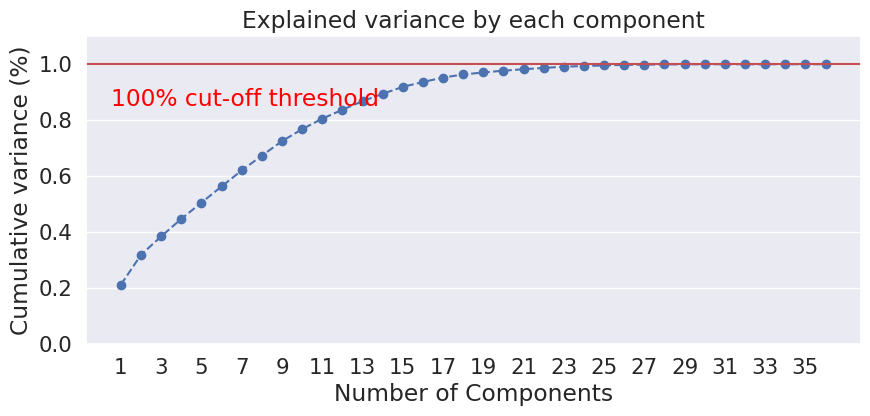

In [292]:
# Explained variance (how important each additional principal component is)
pca = PCA().fit(X)
fig, ax = plt.subplots(figsize=(10,4))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red')
ax.grid(axis='x')

**ÂàõÂª∫‰∏Ä‰∏™È™åËØÅÈõÜ**

Êàë‰ª¨Â∞Ü‰ΩøÁî®È™åËØÅÈõÜÊù•Á°ÆÂÆû‰ΩøÁî®‰ªÄ‰πàÊ†∑ÁöÑÊ®°Âûã

In [293]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

## Ê®°ÂûãÂª∫Á´ã